All codes adapted from: https://github.com/wvangansbeke/Unsupervised-Classification

Reset runtime before executing each section

## CIFAR-100 - Pretrained

In [ ]:
!pip install faiss-gpu
!git clone https://github.com/wvangansbeke/Unsupervised-Classification.git
%cd Unsupervised-Classification
!export CUDA_VISIBLE_DEVICES=0
!mkdir repository_eccv/
!mkdir repository_eccv/cifar-100/
!mkdir repository_eccv/cifar-100/pretext/
!mkdir repository_eccv/cifar-100/scan/
!mkdir repository_eccv/cifar-100/selflabel/
!gdown https://drive.google.com/u/0/uc?id=1huW-ChBVvKcx7t8HyDaWTQB5Li1Fht9x
!mv simclr_cifar-20.pth.tar repository_eccv/cifar-100/pretext/checkpoint.pth.tar  # Move model to correct location
!gdown https://drive.google.com/u/0/uc?id=1pPCi1QG05kP_JdoX29dxEhVddIRk68Sd
!mv scan_cifar-20.pth.tar repository_eccv/cifar-100/scan/model.pth.tar
!gdown https://drive.google.com/u/0/uc?id=11mEmpDMyq63pM4kmDy6ItHouI6Q__uB7
!mv selflabel_cifar-20.pth.tar repository_eccv/cifar-100/selflabel/model.pth.tar
!echo "root_dir: repository_eccv/" > configs/env.yml

     |████████████████████████████████| 85.5 MB 103 kB/s 
Cloning into 'Unsupervised-Classification'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 195 (delta 70), reused 52 (delta 52), pack-reused 94
Receiving objects: 100% (195/195), 13.41 MiB | 29.53 MiB/s, done.
Resolving deltas: 100% (98/98), done.
/content/Unsupervised-Classification
Downloading...
From: https://drive.google.com/u/0/uc?id=1huW-ChBVvKcx7t8HyDaWTQB5Li1Fht9x
To: /content/Unsupervised-Classification/simclr_cifar-20.pth.tar
100% 46.1M/46.1M [00:00<00:00, 159MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1pPCi1QG05kP_JdoX29dxEhVddIRk68Sd
To: /content/Unsupervised-Classification/scan_cifar-20.pth.tar
100% 44.8M/44.8M [00:00<00:00, 200MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=11mEmpDMyq63pM4kmDy6ItHouI6Q__uB7
To: /content/Unsupervised-Classification/selflabel_cifar-20.pth.tar
100% 

Read config file configs/scan/scan_cifar20.yml ...
{'setup': 'scan', 'criterion': 'scan', 'criterion_kwargs': {'entropy_weight': 5.0}, 'update_cluster_head_only': False, 'num_heads': 1, 'backbone': 'resnet18', 'train_db_name': 'cifar-20', 'val_db_name': 'cifar-20', 'num_classes': 20, 'num_neighbors': 20, 'augmentation_strategy': 'ours', 'augmentation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.5071, 0.4867, 0.4408], 'std': [0.2675, 0.2565, 0.2761]}, 'num_strong_augs': 4, 'cutout_kwargs': {'n_holes': 1, 'length': 16, 'random': True}}, 'transformation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.5071, 0.4867, 0.4408], 'std': [0.2675, 0.2565, 0.2761]}}, 'optimizer': 'adam', 'optimizer_kwargs': {'lr': 0.0001, 'weight_decay': 0.0001}, 'epochs': 100, 'batch_size': 512, 'num_workers': 8, 'scheduler': 'constant'}
Get validation dataset ...
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Number of samples: 10000
Get model ...
ClusteringModel(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (shortcut): Sequential()
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride

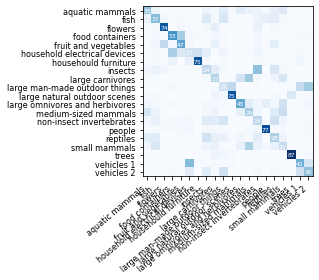

{'ACC': 0.4398, 'ARI': 0.28346553568237726, 'NMI': 0.44873479870485694, 'ACC Top-5': 0.7579, 'hungarian_match': [(0, 3), (1, 4), (2, 2), (3, 13), (4, 9), (5, 6), (6, 10), (7, 16), (8, 7), (9, 15), (10, 11), (11, 17), (12, 0), (13, 19), (14, 18), (15, 8), (16, 14), (17, 5), (18, 12), (19, 1)]}
Get topk


/content/Unsupervised-Classification/eval.py:127: UserWarning: masked_select received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/TensorAdvancedIndexing.cpp:1474.)
  proto_indices = torch.masked_select(indices.view(-1), one_hot.view(-1))


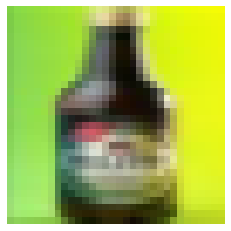

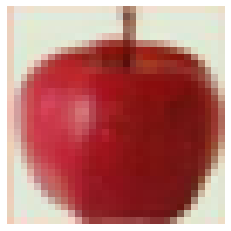

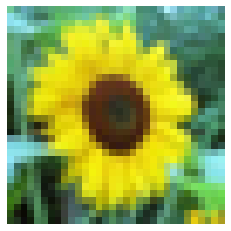

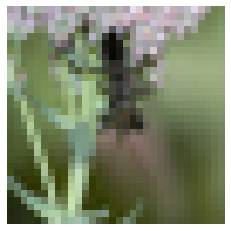

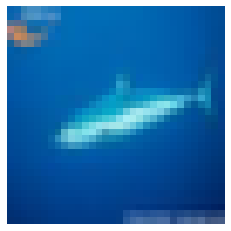

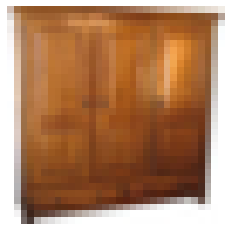

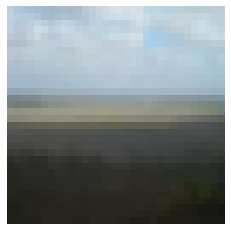

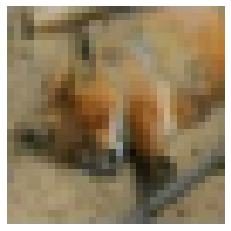

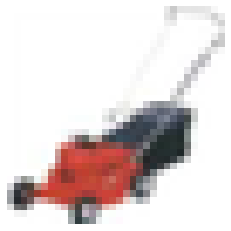

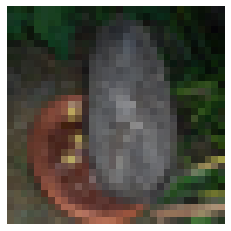

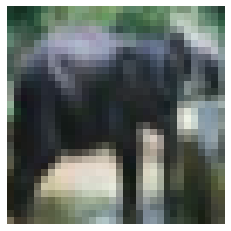

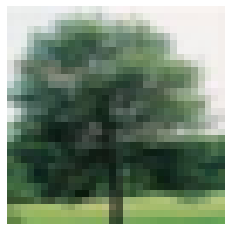

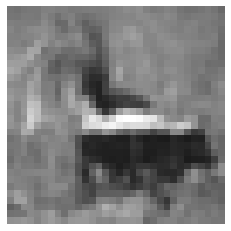

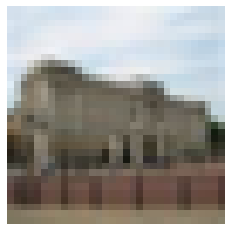

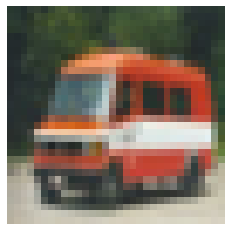

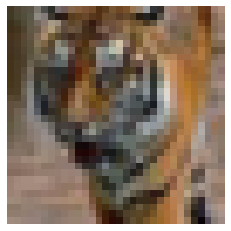

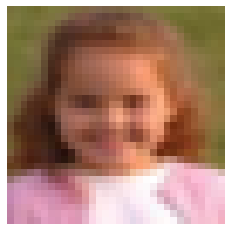

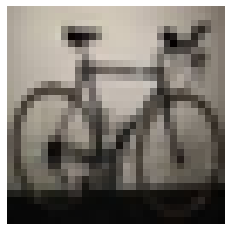

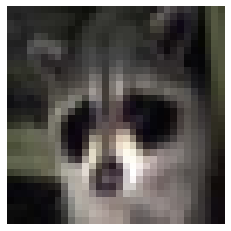

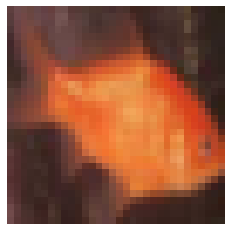

In [ ]:
%run 'eval.py' --config_exp configs/scan/scan_cifar20.yml --model repository_eccv/cifar-100/scan/model.pth.tar --visualize_prototypes

Read config file configs/selflabel/selflabel_cifar20.yml ...
{'setup': 'selflabel', 'use_ema': False, 'confidence_threshold': 0.99, 'criterion': 'confidence-cross-entropy', 'criterion_kwargs': {'apply_class_balancing': True}, 'backbone': 'resnet18', 'num_heads': 1, 'train_db_name': 'cifar-20', 'val_db_name': 'cifar-20', 'num_classes': 20, 'augmentation_strategy': 'ours', 'augmentation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.5071, 0.4867, 0.4408], 'std': [0.2675, 0.2565, 0.2761]}, 'num_strong_augs': 4, 'cutout_kwargs': {'n_holes': 1, 'length': 16, 'random': True}}, 'transformation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.5071, 0.4867, 0.4408], 'std': [0.2675, 0.2565, 0.2761]}}, 'epochs': 200, 'optimizer': 'adam', 'optimizer_kwargs': {'lr': 0.0001, 'weight_decay': 0.0001}, 'batch_size': 512, 'num_workers': 8, 'scheduler': 'constant'}
Get validation dataset ...


  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting /path/to/cifar-20/cifar-100-python.tar.gz to /path/to/cifar-20/


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Number of samples: 10000
Get model ...
ClusteringModel(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (shortcut): Sequential()
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride

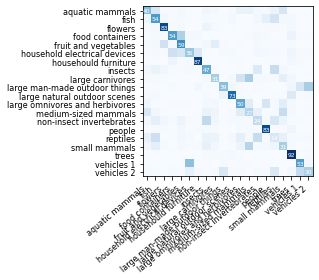

{'ACC': 0.5073, 'ARI': 0.33328295659428797, 'NMI': 0.4856562173970448, 'ACC Top-5': 0.778, 'hungarian_match': [(0, 3), (1, 4), (2, 2), (3, 7), (4, 9), (5, 6), (6, 10), (7, 16), (8, 15), (9, 13), (10, 11), (11, 17), (12, 0), (13, 19), (14, 18), (15, 8), (16, 14), (17, 5), (18, 12), (19, 1)]}
Get topk


/content/Unsupervised-Classification/eval.py:127: UserWarning: masked_select received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/TensorAdvancedIndexing.cpp:1474.)
  proto_indices = torch.masked_select(indices.view(-1), one_hot.view(-1))


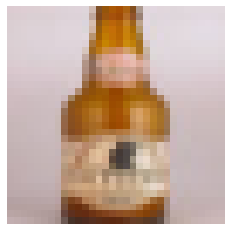

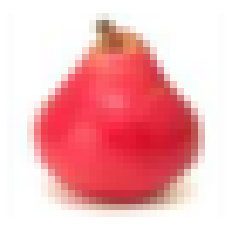

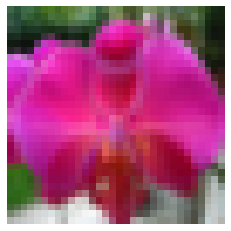

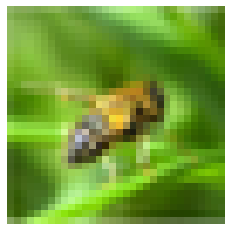

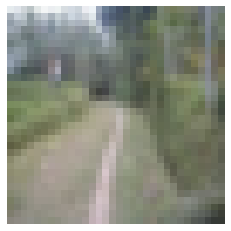

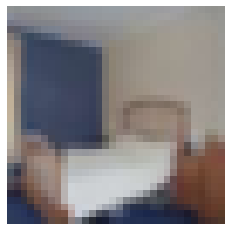

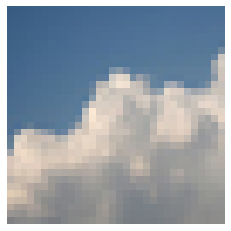

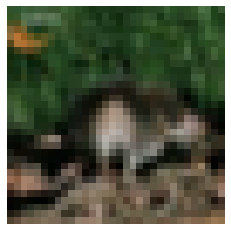

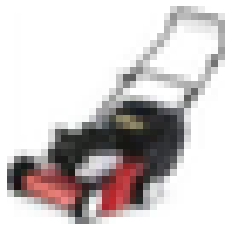

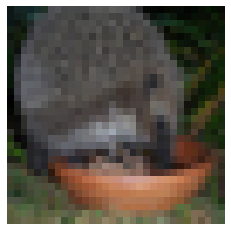

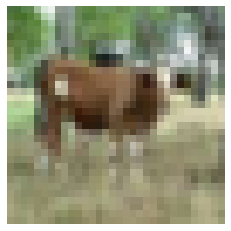

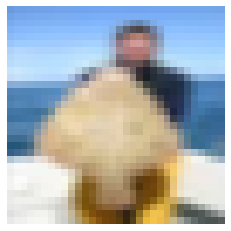

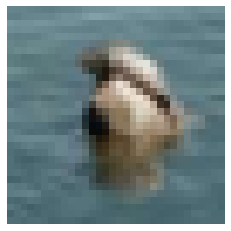

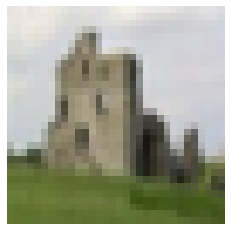

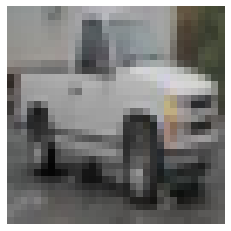

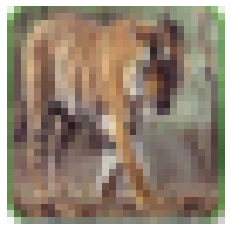

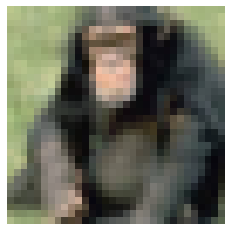

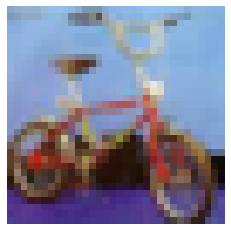

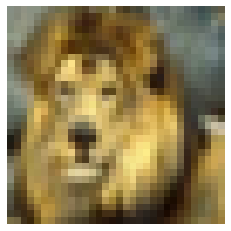

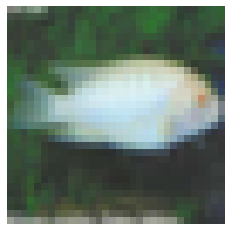

In [ ]:
%run 'eval.py' --config_exp configs/selflabel/selflabel_cifar20.yml --model repository_eccv/cifar-100/selflabel/model.pth.tar --visualize_prototypes

## CIFAR-10 - Pretrained

In [ ]:
!pip install faiss-gpu
!git clone https://github.com/wvangansbeke/Unsupervised-Classification.git
%cd Unsupervised-Classification
!export CUDA_VISIBLE_DEVICES=0
!mkdir repository_eccv/
!mkdir repository_eccv/cifar-10/
!mkdir repository_eccv/cifar-10/pretext/
!mkdir repository_eccv/cifar-10/scan/
!mkdir repository_eccv/cifar-10/selflabel/
!gdown https://drive.google.com/u/0/uc?id=1Cl5oAcJKoNE5FSTZsBSAKLcyA5jXGgTT
!mv simclr_cifar-10.pth.tar repository_eccv/cifar-10/pretext/checkpoint.pth.tar  # Move model to correct location
!gdown https://drive.google.com/u/0/uc?id=1v6b6jJY5M4-duSqWpGFmdf9e9T3dPrx0
!mv scan_cifar-10.pth.tar repository_eccv/cifar-10/scan/model.pth.tar
!gdown https://drive.google.com/u/0/uc?id=18gITFzAbQsGS5vt8hyi5HjbeRDsVLihw
!mv selflabel_cifar-10.pth.tar repository_eccv/cifar-10/selflabel/model.pth.tar
!echo "root_dir: repository_eccv/" > configs/env.yml

     |████████████████████████████████| 85.5 MB 92 kB/s 
Cloning into 'Unsupervised-Classification'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 195 (delta 70), reused 52 (delta 52), pack-reused 94
Receiving objects: 100% (195/195), 13.41 MiB | 29.16 MiB/s, done.
Resolving deltas: 100% (98/98), done.
/content/Unsupervised-Classification
Downloading...
From: https://drive.google.com/u/0/uc?id=1Cl5oAcJKoNE5FSTZsBSAKLcyA5jXGgTT
To: /content/Unsupervised-Classification/simclr_cifar-10.pth.tar
100% 46.1M/46.1M [00:00<00:00, 214MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1v6b6jJY5M4-duSqWpGFmdf9e9T3dPrx0
To: /content/Unsupervised-Classification/scan_cifar-10.pth.tar
100% 44.8M/44.8M [00:00<00:00, 213MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=18gITFzAbQsGS5vt8hyi5HjbeRDsVLihw
To: /content/Unsupervised-Classification/selflabel_cifar-10.pth.tar
100% 4

Read config file configs/scan/scan_cifar10.yml ...
{'setup': 'scan', 'criterion': 'scan', 'criterion_kwargs': {'entropy_weight': 5.0}, 'update_cluster_head_only': False, 'num_heads': 1, 'backbone': 'resnet18', 'train_db_name': 'cifar-10', 'val_db_name': 'cifar-10', 'num_classes': 10, 'num_neighbors': 20, 'augmentation_strategy': 'ours', 'augmentation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2023, 0.1994, 0.201]}, 'num_strong_augs': 4, 'cutout_kwargs': {'n_holes': 1, 'length': 16, 'random': True}}, 'transformation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2023, 0.1994, 0.201]}}, 'optimizer': 'adam', 'optimizer_kwargs': {'lr': 0.0001, 'weight_decay': 0.0001}, 'epochs': 50, 'batch_size': 512, 'num_workers': 8, 'scheduler': 'constant'}
Get validation dataset ...


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /path/to/cifar-10/cifar-10-python.tar.gz to /path/to/cifar-10/


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Number of samples: 10000
Get model ...
ClusteringModel(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (shortcut): Sequential()
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride

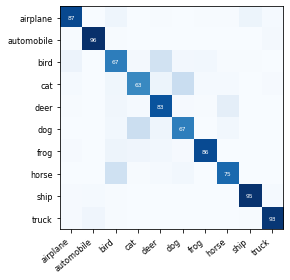

{'ACC': 0.8161, 'ARI': 0.6648343003966783, 'NMI': 0.7145956438322217, 'ACC Top-5': 0.9866, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Get topk


/content/Unsupervised-Classification/eval.py:127: UserWarning: masked_select received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/TensorAdvancedIndexing.cpp:1474.)
  proto_indices = torch.masked_select(indices.view(-1), one_hot.view(-1))


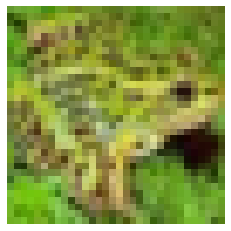

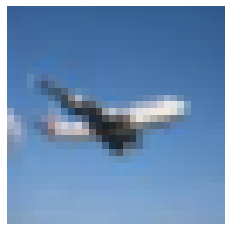

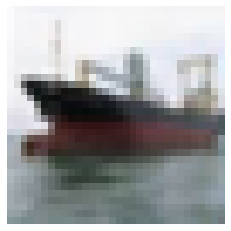

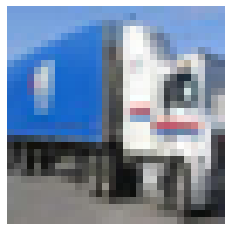

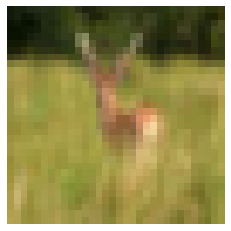

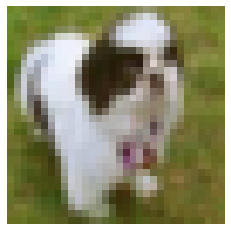

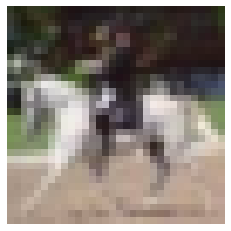

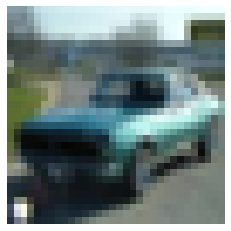

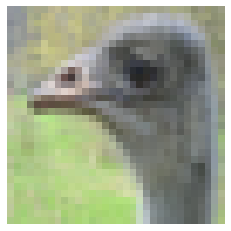

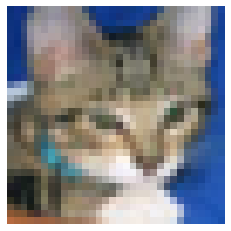

In [ ]:
%run 'eval.py' --config_exp configs/scan/scan_cifar10.yml --model repository_eccv/cifar-10/scan/model.pth.tar --visualize_prototypes

Read config file configs/selflabel/selflabel_cifar10.yml ...
{'setup': 'selflabel', 'use_ema': False, 'confidence_threshold': 0.99, 'criterion': 'confidence-cross-entropy', 'criterion_kwargs': {'apply_class_balancing': True}, 'backbone': 'resnet18', 'num_heads': 1, 'train_db_name': 'cifar-10', 'val_db_name': 'cifar-10', 'num_classes': 10, 'augmentation_strategy': 'ours', 'augmentation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2023, 0.1994, 0.201]}, 'num_strong_augs': 4, 'cutout_kwargs': {'n_holes': 1, 'length': 16, 'random': True}}, 'transformation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2023, 0.1994, 0.201]}}, 'epochs': 200, 'optimizer': 'adam', 'optimizer_kwargs': {'lr': 0.0001, 'weight_decay': 0.0001}, 'batch_size': 512, 'num_workers': 8, 'scheduler': 'constant'}
Get validation dataset ...
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Number of samples: 10000
Get model ...
ClusteringModel(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (shortcut): Sequential()
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride

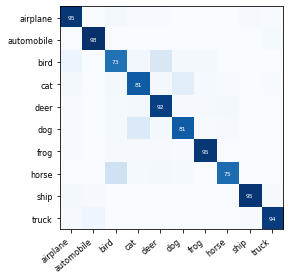

{'ACC': 0.8832, 'ARI': 0.7718394084869493, 'NMI': 0.7971367936317043, 'ACC Top-5': 0.9821, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Get topk


/content/Unsupervised-Classification/eval.py:127: UserWarning: masked_select received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/TensorAdvancedIndexing.cpp:1474.)
  proto_indices = torch.masked_select(indices.view(-1), one_hot.view(-1))


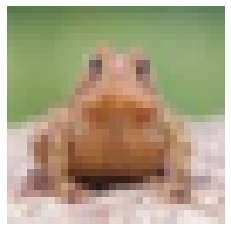

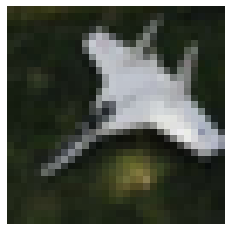

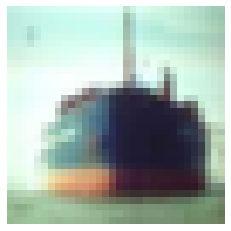

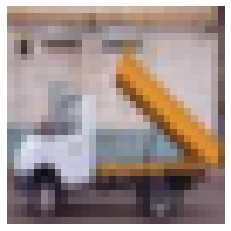

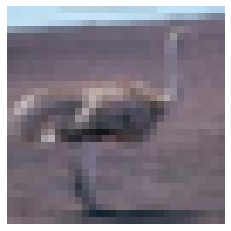

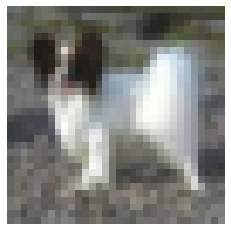

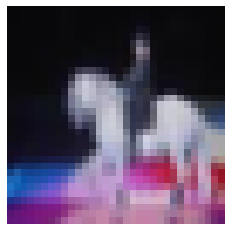

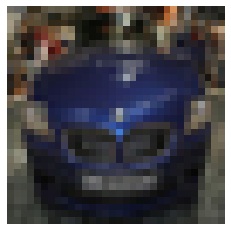

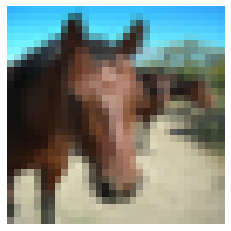

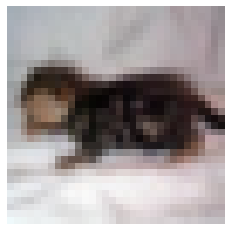

In [ ]:
%run 'eval.py' --config_exp configs/selflabel/selflabel_cifar10.yml --model repository_eccv/cifar-10/selflabel/model.pth.tar --visualize_prototypes

In [ ]:
#%cat eval.py

## CIFAR-10 - Epoch 50 at selflabelling step

In [ ]:
!pip install faiss-gpu
!git clone https://github.com/wvangansbeke/Unsupervised-Classification.git
%cd Unsupervised-Classification
!export CUDA_VISIBLE_DEVICES=0
!mkdir repository_eccv/
!mkdir repository_eccv/cifar-10/
!mkdir repository_eccv/cifar-10/pretext/
!mkdir repository_eccv/cifar-10/scan/
!mkdir repository_eccv/cifar-10/selflabel/
!gdown https://drive.google.com/u/0/uc?id=1Cl5oAcJKoNE5FSTZsBSAKLcyA5jXGgTT
!mv simclr_cifar-10.pth.tar repository_eccv/cifar-10/pretext/checkpoint.pth.tar  # Move model to correct location
!gdown https://drive.google.com/u/0/uc?id=1v6b6jJY5M4-duSqWpGFmdf9e9T3dPrx0
!mv scan_cifar-10.pth.tar repository_eccv/cifar-10/scan/model.pth.tar
!gdown https://drive.google.com/u/0/uc?id=18gITFzAbQsGS5vt8hyi5HjbeRDsVLihw
!mv selflabel_cifar-10.pth.tar repository_eccv/cifar-10/selflabel/model.pth.tar  #not used
!echo "root_dir: repository_eccv/" > configs/env.yml

     |████████████████████████████████| 85.5 MB 1.3 MB/s 
Cloning into 'Unsupervised-Classification'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 195 (delta 70), reused 52 (delta 52), pack-reused 94
Receiving objects: 100% (195/195), 13.41 MiB | 29.85 MiB/s, done.
Resolving deltas: 100% (98/98), done.
/content/Unsupervised-Classification
Downloading...
From: https://drive.google.com/u/0/uc?id=1Cl5oAcJKoNE5FSTZsBSAKLcyA5jXGgTT
To: /content/Unsupervised-Classification/simclr_cifar-10.pth.tar
100% 46.1M/46.1M [00:00<00:00, 236MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1v6b6jJY5M4-duSqWpGFmdf9e9T3dPrx0
To: /content/Unsupervised-Classification/scan_cifar-10.pth.tar
100% 44.8M/44.8M [00:00<00:00, 243MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=18gITFzAbQsGS5vt8hyi5HjbeRDsVLihw
To: /content/Unsupervised-Classification/selflabel_cifar-10.pth.tar
100% 

#### Changing no. of epochs of the self-labelling step

In [ ]:
%%writefile configs/selflabel/selflabel_cifar10.yml
# setup
setup: selflabel

# ema
use_ema: False

# Threshold
confidence_threshold: 0.99

# Criterion
criterion: confidence-cross-entropy
criterion_kwargs:
   apply_class_balancing: True

# Model
backbone: resnet18
num_heads: 1

# Dataset
train_db_name: cifar-10
val_db_name: cifar-10
num_classes: 10

# Transformations
augmentation_strategy: ours 
augmentation_kwargs:
   crop_size: 32
   normalize:
      mean: [0.4914, 0.4822, 0.4465]
      std: [0.2023, 0.1994, 0.2010]
   num_strong_augs: 4
   cutout_kwargs:
     n_holes: 1
     length: 16
     random: True

transformation_kwargs:
   crop_size: 32
   normalize:
      mean: [0.4914, 0.4822, 0.4465]
      std: [0.2023, 0.1994, 0.2010]

# Hyperparameters
epochs: 50
optimizer: adam
optimizer_kwargs:
   lr: 0.0001
   weight_decay: 0.0001
batch_size: 1000
num_workers: 8

# Scheduler
scheduler: constant

Overwriting configs/selflabel/selflabel_cifar10.yml


In [ ]:
%run 'selflabel.py' --config_env configs/env.yml --config_exp configs/selflabel/selflabel_cifar10.yml

{'setup': 'selflabel', 'use_ema': False, 'confidence_threshold': 0.99, 'criterion': 'confidence-cross-entropy', 'criterion_kwargs': {'apply_class_balancing': True}, 'backbone': 'resnet18', 'num_heads': 1, 'train_db_name': 'cifar-10', 'val_db_name': 'cifar-10', 'num_classes': 10, 'augmentation_strategy': 'ours', 'augmentation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2023, 0.1994, 0.201]}, 'num_strong_augs': 4, 'cutout_kwargs': {'n_holes': 1, 'length': 16, 'random': True}}, 'transformation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2023, 0.1994, 0.201]}}, 'epochs': 50, 'optimizer': 'adam', 'optimizer_kwargs': {'lr': 0.0001, 'weight_decay': 0.0001}, 'batch_size': 1000, 'num_workers': 8, 'scheduler': 'constant', 'pretext_dir': 'repository_eccv/cifar-10/pretext', 'pretext_checkpoint': 'repository_eccv/cifar-10/pretext/checkpoint.pth.tar', 'pretext_model': 'repository_eccv/cifar-10/pretext/model.pth.tar', '

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /path/to/cifar-10/cifar-10-python.tar.gz to /path/to/cifar-10/


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Files already downloaded and verified
Train samples 50000 - Val samples 10000
No checkpoint file at repository_eccv/cifar-10/selflabel/checkpoint.pth.tar
Starting main loop
Epoch 1/50
----------
Adjusted learning rate to 0.00010
Train ...
Epoch: [0][ 0/50]	Loss 6.1939e-02 (6.1939e-02)
Epoch: [0][25/50]	Loss 4.3224e-02 (5.1961e-02)
Evaluate ...
{'ACC': 0.8377, 'ARI': 0.6966756122750524, 'NMI': 0.7371456061210339, 'ACC Top-5': 0.9903, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 2/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [1][ 0/50]	Loss 6.3424e-02 (6.3424e-02)
Epoch: [1][25/50]	Loss 6.5421e-02 (6.1025e-02)
Evaluate ...
{'ACC': 0.8452, 'ARI': 0.7091599824571786, 'NMI': 0.7467964446348999, 'ACC Top-5': 0.9897, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 3/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [2][ 0/50]	Loss 6.1055e-02 (6.1055e-02)
Epoch: [2][25/50]	Loss 6.2969e-02 (6.9138e-02)
Evaluate ...
{'ACC': 0.8471, 'ARI': 0.7122852972695461, 'NMI': 0.7495527262680696, 'ACC Top-5': 0.9913, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 4/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [3][ 0/50]	Loss 6.7188e-02 (6.7188e-02)
Epoch: [3][25/50]	Loss 5.9348e-02 (6.3064e-02)
Evaluate ...
{'ACC': 0.8495, 'ARI': 0.717323113465688, 'NMI': 0.7523738859141412, 'ACC Top-5': 0.9905, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 5/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [4][ 0/50]	Loss 5.2865e-02 (5.2865e-02)
Epoch: [4][25/50]	Loss 5.6366e-02 (6.5200e-02)
Evaluate ...
{'ACC': 0.8482, 'ARI': 0.7148680630216867, 'NMI': 0.7497180494952793, 'ACC Top-5': 0.99, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 6/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [5][ 0/50]	Loss 5.8769e-02 (5.8769e-02)
Epoch: [5][25/50]	Loss 7.7939e-02 (6.8270e-02)
Evaluate ...
{'ACC': 0.849, 'ARI': 0.7156282210574114, 'NMI': 0.7529994845136586, 'ACC Top-5': 0.9896, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 7/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [6][ 0/50]	Loss 4.9280e-02 (4.9280e-02)
Epoch: [6][25/50]	Loss 7.9194e-02 (6.6084e-02)
Evaluate ...
{'ACC': 0.851, 'ARI': 0.7188475463246617, 'NMI': 0.7539793392312633, 'ACC Top-5': 0.9902, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 8/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [7][ 0/50]	Loss 5.7682e-02 (5.7682e-02)
Epoch: [7][25/50]	Loss 5.4142e-02 (7.1440e-02)
Evaluate ...
{'ACC': 0.8522, 'ARI': 0.7220688528116301, 'NMI': 0.7566992668773436, 'ACC Top-5': 0.99, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 9/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [8][ 0/50]	Loss 6.3686e-02 (6.3686e-02)
Epoch: [8][25/50]	Loss 4.7065e-02 (7.0238e-02)
Evaluate ...
{'ACC': 0.8518, 'ARI': 0.7208086604219716, 'NMI': 0.7548303013145816, 'ACC Top-5': 0.9914, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 10/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [9][ 0/50]	Loss 7.9610e-02 (7.9610e-02)
Epoch: [9][25/50]	Loss 8.5112e-02 (6.4935e-02)
Evaluate ...
{'ACC': 0.8518, 'ARI': 0.7209978068404537, 'NMI': 0.7584976780676763, 'ACC Top-5': 0.9908, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 11/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [10][ 0/50]	Loss 5.2538e-02 (5.2538e-02)
Epoch: [10][25/50]	Loss 7.2619e-02 (6.4870e-02)
Evaluate ...
{'ACC': 0.8521, 'ARI': 0.7218260140374015, 'NMI': 0.757441600744746, 'ACC Top-5': 0.9892, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 12/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [11][ 0/50]	Loss 4.5411e-02 (4.5411e-02)
Epoch: [11][25/50]	Loss 9.7588e-02 (7.1072e-02)
Evaluate ...
{'ACC': 0.8556, 'ARI': 0.7274882317405519, 'NMI': 0.7605821303232032, 'ACC Top-5': 0.9911, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 13/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [12][ 0/50]	Loss 6.9703e-02 (6.9703e-02)
Epoch: [12][25/50]	Loss 5.9488e-02 (6.8567e-02)
Evaluate ...
{'ACC': 0.8518, 'ARI': 0.7208485575041109, 'NMI': 0.7553180487270582, 'ACC Top-5': 0.9905, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 14/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [13][ 0/50]	Loss 7.5758e-02 (7.5758e-02)
Epoch: [13][25/50]	Loss 6.3937e-02 (6.8785e-02)
Evaluate ...
{'ACC': 0.8548, 'ARI': 0.7246668170182864, 'NMI': 0.7582835884469169, 'ACC Top-5': 0.9903, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 15/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [14][ 0/50]	Loss 6.1930e-02 (6.1930e-02)
Epoch: [14][25/50]	Loss 7.4458e-02 (6.1205e-02)
Evaluate ...
{'ACC': 0.858, 'ARI': 0.7291116347273205, 'NMI': 0.7625608567058156, 'ACC Top-5': 0.9906, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 16/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [15][ 0/50]	Loss 6.2728e-02 (6.2728e-02)
Epoch: [15][25/50]	Loss 4.4289e-02 (6.5964e-02)
Evaluate ...
{'ACC': 0.857, 'ARI': 0.7290109064238439, 'NMI': 0.7638898083233496, 'ACC Top-5': 0.9906, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 17/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [16][ 0/50]	Loss 6.9375e-02 (6.9375e-02)
Epoch: [16][25/50]	Loss 7.6911e-02 (6.3171e-02)
Evaluate ...
{'ACC': 0.8588, 'ARI': 0.7321443069938577, 'NMI': 0.7641869619550399, 'ACC Top-5': 0.9902, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 18/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [17][ 0/50]	Loss 6.9903e-02 (6.9903e-02)
Epoch: [17][25/50]	Loss 5.1721e-02 (6.9155e-02)
Evaluate ...
{'ACC': 0.8598, 'ARI': 0.7334613856161828, 'NMI': 0.7646589325885963, 'ACC Top-5': 0.9902, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 19/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [18][ 0/50]	Loss 7.5864e-02 (7.5864e-02)
Epoch: [18][25/50]	Loss 7.8658e-02 (6.8828e-02)
Evaluate ...
{'ACC': 0.8584, 'ARI': 0.7293687121210923, 'NMI': 0.7641492526816088, 'ACC Top-5': 0.9915, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 20/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [19][ 0/50]	Loss 8.2610e-02 (8.2610e-02)
Epoch: [19][25/50]	Loss 6.6414e-02 (6.6926e-02)
Evaluate ...
{'ACC': 0.8622, 'ARI': 0.7375034866438797, 'NMI': 0.7675156926723866, 'ACC Top-5': 0.9904, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 21/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [20][ 0/50]	Loss 7.2916e-02 (7.2916e-02)
Epoch: [20][25/50]	Loss 8.4074e-02 (6.7004e-02)
Evaluate ...
{'ACC': 0.8636, 'ARI': 0.738791301713437, 'NMI': 0.771687703459712, 'ACC Top-5': 0.9908, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 22/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [21][ 0/50]	Loss 7.4887e-02 (7.4887e-02)
Epoch: [21][25/50]	Loss 4.9337e-02 (6.7794e-02)
Evaluate ...
{'ACC': 0.8604, 'ARI': 0.7341248082590148, 'NMI': 0.7679698162234532, 'ACC Top-5': 0.9908, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 23/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [22][ 0/50]	Loss 4.7931e-02 (4.7931e-02)
Epoch: [22][25/50]	Loss 6.0520e-02 (6.7440e-02)
Evaluate ...
{'ACC': 0.8618, 'ARI': 0.736090656948272, 'NMI': 0.7656183952170927, 'ACC Top-5': 0.9904, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 24/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [23][ 0/50]	Loss 7.7640e-02 (7.7640e-02)
Epoch: [23][25/50]	Loss 6.2871e-02 (6.7175e-02)
Evaluate ...
{'ACC': 0.8597, 'ARI': 0.7318386676934663, 'NMI': 0.7649575961475846, 'ACC Top-5': 0.9884, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 25/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [24][ 0/50]	Loss 7.8925e-02 (7.8925e-02)
Epoch: [24][25/50]	Loss 7.2896e-02 (7.3365e-02)
Evaluate ...
{'ACC': 0.8609, 'ARI': 0.7353338074033793, 'NMI': 0.7659034046830547, 'ACC Top-5': 0.9904, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 26/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [25][ 0/50]	Loss 4.9468e-02 (4.9468e-02)
Epoch: [25][25/50]	Loss 9.1123e-02 (6.9429e-02)
Evaluate ...
{'ACC': 0.8635, 'ARI': 0.7392846291672116, 'NMI': 0.7702510878064905, 'ACC Top-5': 0.9911, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 27/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [26][ 0/50]	Loss 5.7776e-02 (5.7776e-02)
Epoch: [26][25/50]	Loss 7.1446e-02 (6.7790e-02)
Evaluate ...
{'ACC': 0.8627, 'ARI': 0.7367874216696789, 'NMI': 0.7672490699817354, 'ACC Top-5': 0.9899, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 28/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [27][ 0/50]	Loss 3.7990e-02 (3.7990e-02)
Epoch: [27][25/50]	Loss 6.0592e-02 (6.9425e-02)
Evaluate ...
{'ACC': 0.8612, 'ARI': 0.7347780711590713, 'NMI': 0.7640299530563182, 'ACC Top-5': 0.9892, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 29/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [28][ 0/50]	Loss 6.8078e-02 (6.8078e-02)
Epoch: [28][25/50]	Loss 6.9431e-02 (6.2203e-02)
Evaluate ...
{'ACC': 0.8598, 'ARI': 0.731965656599717, 'NMI': 0.7652211844630671, 'ACC Top-5': 0.9889, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 30/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [29][ 0/50]	Loss 4.6545e-02 (4.6545e-02)
Epoch: [29][25/50]	Loss 5.0140e-02 (6.3014e-02)
Evaluate ...
{'ACC': 0.864, 'ARI': 0.7402766033049559, 'NMI': 0.7715163330641125, 'ACC Top-5': 0.9902, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 31/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [30][ 0/50]	Loss 6.9425e-02 (6.9425e-02)
Epoch: [30][25/50]	Loss 7.2925e-02 (6.8477e-02)
Evaluate ...
{'ACC': 0.8627, 'ARI': 0.7376258211303824, 'NMI': 0.7669408915678314, 'ACC Top-5': 0.9901, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 32/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [31][ 0/50]	Loss 6.0954e-02 (6.0954e-02)
Epoch: [31][25/50]	Loss 6.3762e-02 (6.5582e-02)
Evaluate ...
{'ACC': 0.8655, 'ARI': 0.743295069746102, 'NMI': 0.7737178144745926, 'ACC Top-5': 0.9897, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 33/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [32][ 0/50]	Loss 6.0387e-02 (6.0387e-02)
Epoch: [32][25/50]	Loss 5.7839e-02 (6.5060e-02)
Evaluate ...
{'ACC': 0.8613, 'ARI': 0.735449760725629, 'NMI': 0.7681567546072083, 'ACC Top-5': 0.9867, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 34/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [33][ 0/50]	Loss 6.2712e-02 (6.2712e-02)
Epoch: [33][25/50]	Loss 6.5059e-02 (6.6633e-02)
Evaluate ...
{'ACC': 0.8643, 'ARI': 0.7410667002499773, 'NMI': 0.7709197248616056, 'ACC Top-5': 0.9846, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 35/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [34][ 0/50]	Loss 7.7755e-02 (7.7755e-02)
Epoch: [34][25/50]	Loss 5.6728e-02 (6.8298e-02)
Evaluate ...
{'ACC': 0.8625, 'ARI': 0.7381941613182962, 'NMI': 0.7690320470713542, 'ACC Top-5': 0.9832, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 36/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [35][ 0/50]	Loss 7.0176e-02 (7.0176e-02)
Epoch: [35][25/50]	Loss 8.0473e-02 (6.6868e-02)
Evaluate ...
{'ACC': 0.8636, 'ARI': 0.7400673370860147, 'NMI': 0.7722205107828541, 'ACC Top-5': 0.9859, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 37/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [36][ 0/50]	Loss 9.6880e-02 (9.6880e-02)
Epoch: [36][25/50]	Loss 7.1223e-02 (6.8738e-02)
Evaluate ...
{'ACC': 0.8638, 'ARI': 0.7398233453977126, 'NMI': 0.7699154210152311, 'ACC Top-5': 0.9867, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 38/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [37][ 0/50]	Loss 8.0301e-02 (8.0301e-02)
Epoch: [37][25/50]	Loss 8.1132e-02 (6.5480e-02)
Evaluate ...
{'ACC': 0.8636, 'ARI': 0.7390275528174431, 'NMI': 0.7725223834505346, 'ACC Top-5': 0.9826, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 39/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [38][ 0/50]	Loss 4.9012e-02 (4.9012e-02)
Epoch: [38][25/50]	Loss 9.2208e-02 (6.9575e-02)
Evaluate ...
{'ACC': 0.8639, 'ARI': 0.7399658244627225, 'NMI': 0.7725415738692296, 'ACC Top-5': 0.9826, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 40/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [39][ 0/50]	Loss 3.8724e-02 (3.8724e-02)
Epoch: [39][25/50]	Loss 5.4135e-02 (6.9867e-02)
Evaluate ...
{'ACC': 0.8653, 'ARI': 0.7429487899386626, 'NMI': 0.7746651340724681, 'ACC Top-5': 0.979, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 41/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [40][ 0/50]	Loss 5.3319e-02 (5.3319e-02)
Epoch: [40][25/50]	Loss 8.0843e-02 (6.8781e-02)
Evaluate ...
{'ACC': 0.8672, 'ARI': 0.7464333197102674, 'NMI': 0.7748966707069543, 'ACC Top-5': 0.9795, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 42/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [41][ 0/50]	Loss 6.4444e-02 (6.4444e-02)
Epoch: [41][25/50]	Loss 5.0579e-02 (6.3183e-02)
Evaluate ...
{'ACC': 0.8658, 'ARI': 0.7423923222116459, 'NMI': 0.773104593469747, 'ACC Top-5': 0.9791, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 43/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [42][ 0/50]	Loss 8.3018e-02 (8.3018e-02)
Epoch: [42][25/50]	Loss 7.7957e-02 (7.0616e-02)
Evaluate ...
{'ACC': 0.8649, 'ARI': 0.7418724653766405, 'NMI': 0.7730107026593752, 'ACC Top-5': 0.9756, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 44/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [43][ 0/50]	Loss 7.3280e-02 (7.3280e-02)
Epoch: [43][25/50]	Loss 6.5191e-02 (6.9828e-02)
Evaluate ...
{'ACC': 0.8661, 'ARI': 0.7432249740698404, 'NMI': 0.7749005147975323, 'ACC Top-5': 0.9803, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 45/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [44][ 0/50]	Loss 7.2050e-02 (7.2050e-02)
Epoch: [44][25/50]	Loss 8.1057e-02 (6.6296e-02)
Evaluate ...
{'ACC': 0.8681, 'ARI': 0.7465848678861067, 'NMI': 0.7768058344503628, 'ACC Top-5': 0.9801, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 46/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [45][ 0/50]	Loss 4.3780e-02 (4.3780e-02)
Epoch: [45][25/50]	Loss 5.9582e-02 (6.1585e-02)
Evaluate ...
{'ACC': 0.8665, 'ARI': 0.7443295342740294, 'NMI': 0.7762468265066146, 'ACC Top-5': 0.9821, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 47/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [46][ 0/50]	Loss 8.2949e-02 (8.2949e-02)
Epoch: [46][25/50]	Loss 6.7608e-02 (6.6632e-02)
Evaluate ...
{'ACC': 0.8671, 'ARI': 0.7459218229656145, 'NMI': 0.7754827934641007, 'ACC Top-5': 0.9777, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 48/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [47][ 0/50]	Loss 5.5635e-02 (5.5635e-02)
Epoch: [47][25/50]	Loss 6.0939e-02 (6.6789e-02)
Evaluate ...
{'ACC': 0.869, 'ARI': 0.7487502224727087, 'NMI': 0.7779379590175175, 'ACC Top-5': 0.9789, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 49/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [48][ 0/50]	Loss 7.6150e-02 (7.6150e-02)
Epoch: [48][25/50]	Loss 8.4397e-02 (6.4640e-02)
Evaluate ...
{'ACC': 0.8678, 'ARI': 0.7464855246748321, 'NMI': 0.7754545069380235, 'ACC Top-5': 0.9849, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 50/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [49][ 0/50]	Loss 7.7249e-02 (7.7249e-02)
Epoch: [49][25/50]	Loss 7.9464e-02 (6.7486e-02)
Evaluate ...
{'ACC': 0.8665, 'ARI': 0.7441643209132777, 'NMI': 0.7730926584622608, 'ACC Top-5': 0.9849, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Evaluate model at the end


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'ACC': 0.8665, 'ARI': 0.7441643209132777, 'NMI': 0.7730926584622608, 'ACC Top-5': 0.9849, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}


Read config file configs/selflabel/selflabel_cifar10.yml ...
{'setup': 'selflabel', 'use_ema': False, 'confidence_threshold': 0.99, 'criterion': 'confidence-cross-entropy', 'criterion_kwargs': {'apply_class_balancing': True}, 'backbone': 'resnet18', 'num_heads': 1, 'train_db_name': 'cifar-10', 'val_db_name': 'cifar-10', 'num_classes': 10, 'augmentation_strategy': 'ours', 'augmentation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2023, 0.1994, 0.201]}, 'num_strong_augs': 4, 'cutout_kwargs': {'n_holes': 1, 'length': 16, 'random': True}}, 'transformation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2023, 0.1994, 0.201]}}, 'epochs': 50, 'optimizer': 'adam', 'optimizer_kwargs': {'lr': 0.0001, 'weight_decay': 0.0001}, 'batch_size': 512, 'num_workers': 8, 'scheduler': 'constant'}
Get validation dataset ...
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Number of samples: 10000
Get model ...
ClusteringModel(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (shortcut): Sequential()
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride

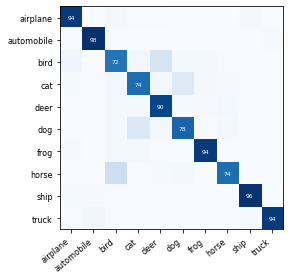

{'ACC': 0.8665, 'ARI': 0.7441643209132777, 'NMI': 0.7730926584622608, 'ACC Top-5': 0.9849, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Get topk


/content/Unsupervised-Classification/eval.py:127: UserWarning: masked_select received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/TensorAdvancedIndexing.cpp:1474.)
  proto_indices = torch.masked_select(indices.view(-1), one_hot.view(-1))


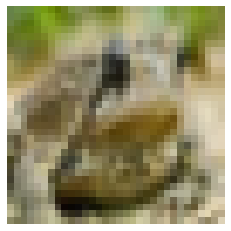

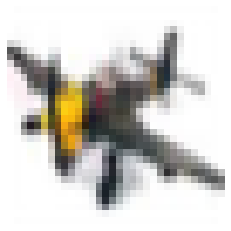

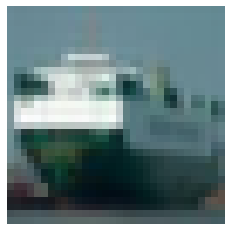

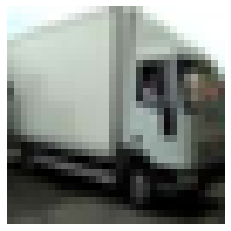

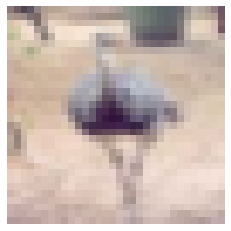

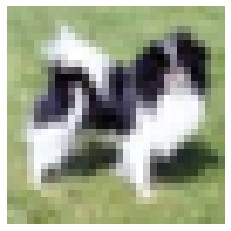

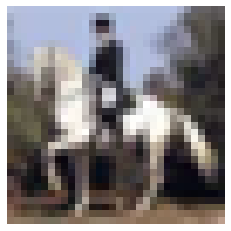

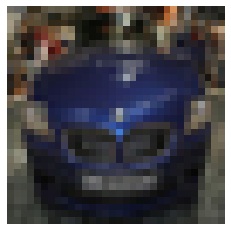

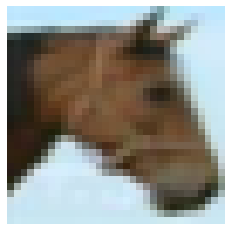

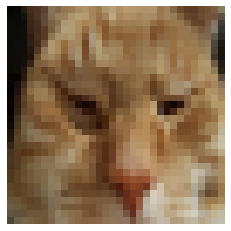

In [ ]:
%run 'eval.py' --config_exp configs/selflabel/selflabel_cifar10.yml --model repository_eccv/cifar-10/selflabel/model.pth.tar --visualize_prototypes

## CIFAR-10 - Threshold 0.95, epoch 50 at selflabelling step

In [ ]:
!pip install faiss-gpu
!git clone https://github.com/wvangansbeke/Unsupervised-Classification.git
%cd Unsupervised-Classification
!export CUDA_VISIBLE_DEVICES=0
!mkdir repository_eccv/
!mkdir repository_eccv/cifar-10/
!mkdir repository_eccv/cifar-10/pretext/
!mkdir repository_eccv/cifar-10/scan/
!mkdir repository_eccv/cifar-10/selflabel/
!gdown https://drive.google.com/u/0/uc?id=1Cl5oAcJKoNE5FSTZsBSAKLcyA5jXGgTT
!mv simclr_cifar-10.pth.tar repository_eccv/cifar-10/pretext/checkpoint.pth.tar  # Move model to correct location
!gdown https://drive.google.com/u/0/uc?id=1v6b6jJY5M4-duSqWpGFmdf9e9T3dPrx0
!mv scan_cifar-10.pth.tar repository_eccv/cifar-10/scan/model.pth.tar
!gdown https://drive.google.com/u/0/uc?id=18gITFzAbQsGS5vt8hyi5HjbeRDsVLihw
!mv selflabel_cifar-10.pth.tar repository_eccv/cifar-10/selflabel/model.pth.tar  #not used
!echo "root_dir: repository_eccv/" > configs/env.yml

     |████████████████████████████████| 85.5 MB 89 kB/s 
Cloning into 'Unsupervised-Classification'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 195 (delta 70), reused 52 (delta 52), pack-reused 94
Receiving objects: 100% (195/195), 13.41 MiB | 30.79 MiB/s, done.
Resolving deltas: 100% (98/98), done.
/content/Unsupervised-Classification
Downloading...
From: https://drive.google.com/u/0/uc?id=1Cl5oAcJKoNE5FSTZsBSAKLcyA5jXGgTT
To: /content/Unsupervised-Classification/simclr_cifar-10.pth.tar
100% 46.1M/46.1M [00:00<00:00, 242MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1v6b6jJY5M4-duSqWpGFmdf9e9T3dPrx0
To: /content/Unsupervised-Classification/scan_cifar-10.pth.tar
100% 44.8M/44.8M [00:00<00:00, 219MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=18gITFzAbQsGS5vt8hyi5HjbeRDsVLihw
To: /content/Unsupervised-Classification/selflabel_cifar-10.pth.tar
100% 4

In [ ]:
%%writefile configs/selflabel/selflabel_cifar10.yml
# setup
setup: selflabel

# ema
use_ema: False

# Threshold
confidence_threshold: 0.95

# Criterion
criterion: confidence-cross-entropy
criterion_kwargs:
   apply_class_balancing: True

# Model
backbone: resnet18
num_heads: 1

# Dataset
train_db_name: cifar-10
val_db_name: cifar-10
num_classes: 10

# Transformations
augmentation_strategy: ours 
augmentation_kwargs:
   crop_size: 32
   normalize:
      mean: [0.4914, 0.4822, 0.4465]
      std: [0.2023, 0.1994, 0.2010]
   num_strong_augs: 4
   cutout_kwargs:
     n_holes: 1
     length: 16
     random: True

transformation_kwargs:
   crop_size: 32
   normalize:
      mean: [0.4914, 0.4822, 0.4465]
      std: [0.2023, 0.1994, 0.2010]

# Hyperparameters
epochs: 50
optimizer: adam
optimizer_kwargs:
   lr: 0.0001
   weight_decay: 0.0001
batch_size: 1000
num_workers: 8

# Scheduler
scheduler: constant

Overwriting configs/selflabel/selflabel_cifar10.yml


In [ ]:
%run 'selflabel.py' --config_env configs/env.yml --config_exp configs/selflabel/selflabel_cifar10.yml

{'setup': 'selflabel', 'use_ema': False, 'confidence_threshold': 0.95, 'criterion': 'confidence-cross-entropy', 'criterion_kwargs': {'apply_class_balancing': True}, 'backbone': 'resnet18', 'num_heads': 1, 'train_db_name': 'cifar-10', 'val_db_name': 'cifar-10', 'num_classes': 10, 'augmentation_strategy': 'ours', 'augmentation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2023, 0.1994, 0.201]}, 'num_strong_augs': 4, 'cutout_kwargs': {'n_holes': 1, 'length': 16, 'random': True}}, 'transformation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2023, 0.1994, 0.201]}}, 'epochs': 50, 'optimizer': 'adam', 'optimizer_kwargs': {'lr': 0.0001, 'weight_decay': 0.0001}, 'batch_size': 1000, 'num_workers': 8, 'scheduler': 'constant', 'pretext_dir': 'repository_eccv/cifar-10/pretext', 'pretext_checkpoint': 'repository_eccv/cifar-10/pretext/checkpoint.pth.tar', 'pretext_model': 'repository_eccv/cifar-10/pretext/model.pth.tar', '

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /path/to/cifar-10/cifar-10-python.tar.gz to /path/to/cifar-10/


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Files already downloaded and verified
Train samples 50000 - Val samples 10000
No checkpoint file at repository_eccv/cifar-10/selflabel/checkpoint.pth.tar
Starting main loop
Epoch 1/50
----------
Adjusted learning rate to 0.00010
Train ...
Epoch: [0][ 0/50]	Loss 8.2558e-02 (8.2558e-02)
Epoch: [0][25/50]	Loss 7.4575e-02 (8.2267e-02)
Evaluate ...
{'ACC': 0.8451, 'ARI': 0.7102180844358248, 'NMI': 0.7504383092215066, 'ACC Top-5': 0.9903, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 2/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [1][ 0/50]	Loss 1.0010e-01 (1.0010e-01)
Epoch: [1][25/50]	Loss 8.3651e-02 (9.3497e-02)
Evaluate ...
{'ACC': 0.8464, 'ARI': 0.7130928704140911, 'NMI': 0.7510188047843172, 'ACC Top-5': 0.9898, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 3/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [2][ 0/50]	Loss 6.0538e-02 (6.0538e-02)
Epoch: [2][25/50]	Loss 8.4648e-02 (9.3645e-02)
Evaluate ...
{'ACC': 0.8503, 'ARI': 0.7187743676285484, 'NMI': 0.7535626416366957, 'ACC Top-5': 0.9902, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 4/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [3][ 0/50]	Loss 1.1035e-01 (1.1035e-01)
Epoch: [3][25/50]	Loss 1.1136e-01 (1.0306e-01)
Evaluate ...
{'ACC': 0.8525, 'ARI': 0.7227855488867112, 'NMI': 0.760256652982384, 'ACC Top-5': 0.9915, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 5/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [4][ 0/50]	Loss 1.1590e-01 (1.1590e-01)
Epoch: [4][25/50]	Loss 8.7265e-02 (9.8550e-02)
Evaluate ...
{'ACC': 0.8535, 'ARI': 0.7242735840891438, 'NMI': 0.7633655160287315, 'ACC Top-5': 0.993, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 6/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [5][ 0/50]	Loss 7.3053e-02 (7.3053e-02)
Epoch: [5][25/50]	Loss 1.1399e-01 (9.5229e-02)
Evaluate ...
{'ACC': 0.8562, 'ARI': 0.7291329510192598, 'NMI': 0.7656178905320498, 'ACC Top-5': 0.9912, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 7/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [6][ 0/50]	Loss 9.7548e-02 (9.7548e-02)
Epoch: [6][25/50]	Loss 1.0089e-01 (9.3142e-02)
Evaluate ...
{'ACC': 0.8577, 'ARI': 0.7319060804400921, 'NMI': 0.7678253444787756, 'ACC Top-5': 0.9926, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 8/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [7][ 0/50]	Loss 6.7041e-02 (6.7041e-02)
Epoch: [7][25/50]	Loss 1.0210e-01 (9.6424e-02)
Evaluate ...
{'ACC': 0.8552, 'ARI': 0.7281982504197068, 'NMI': 0.764638400752688, 'ACC Top-5': 0.9916, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 9/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [8][ 0/50]	Loss 9.4964e-02 (9.4964e-02)
Epoch: [8][25/50]	Loss 9.3116e-02 (9.5021e-02)
Evaluate ...
{'ACC': 0.8575, 'ARI': 0.7319845323160583, 'NMI': 0.7672996639225246, 'ACC Top-5': 0.9931, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 10/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [9][ 0/50]	Loss 1.0721e-01 (1.0721e-01)
Epoch: [9][25/50]	Loss 8.4017e-02 (1.0172e-01)
Evaluate ...
{'ACC': 0.8596, 'ARI': 0.734850044163747, 'NMI': 0.7707081903360141, 'ACC Top-5': 0.9923, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 11/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [10][ 0/50]	Loss 9.6131e-02 (9.6131e-02)
Epoch: [10][25/50]	Loss 9.4987e-02 (9.3862e-02)
Evaluate ...
{'ACC': 0.8581, 'ARI': 0.7320240930495432, 'NMI': 0.7659006289606768, 'ACC Top-5': 0.9918, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 12/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [11][ 0/50]	Loss 7.7529e-02 (7.7529e-02)
Epoch: [11][25/50]	Loss 7.6682e-02 (9.6531e-02)
Evaluate ...
{'ACC': 0.8576, 'ARI': 0.7309602852292592, 'NMI': 0.7675753152157354, 'ACC Top-5': 0.9914, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 13/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [12][ 0/50]	Loss 7.9718e-02 (7.9718e-02)
Epoch: [12][25/50]	Loss 8.6422e-02 (9.9417e-02)
Evaluate ...
{'ACC': 0.8626, 'ARI': 0.7389005747305709, 'NMI': 0.7715004696893243, 'ACC Top-5': 0.9907, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 14/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [13][ 0/50]	Loss 6.2913e-02 (6.2913e-02)
Epoch: [13][25/50]	Loss 8.9712e-02 (9.8404e-02)
Evaluate ...
{'ACC': 0.8603, 'ARI': 0.7344124466561257, 'NMI': 0.7691434395449911, 'ACC Top-5': 0.9909, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 15/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [14][ 0/50]	Loss 8.2239e-02 (8.2239e-02)
Epoch: [14][25/50]	Loss 7.4208e-02 (9.4308e-02)
Evaluate ...
{'ACC': 0.862, 'ARI': 0.7378417183495137, 'NMI': 0.770554863415966, 'ACC Top-5': 0.992, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 16/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [15][ 0/50]	Loss 8.2054e-02 (8.2054e-02)
Epoch: [15][25/50]	Loss 1.2451e-01 (9.5161e-02)
Evaluate ...
{'ACC': 0.8591, 'ARI': 0.733339456707405, 'NMI': 0.7687413231830502, 'ACC Top-5': 0.9926, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 17/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [16][ 0/50]	Loss 1.1286e-01 (1.1286e-01)
Epoch: [16][25/50]	Loss 1.1346e-01 (9.4644e-02)
Evaluate ...
{'ACC': 0.8598, 'ARI': 0.733572650227519, 'NMI': 0.7681322109686035, 'ACC Top-5': 0.9925, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 18/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [17][ 0/50]	Loss 1.1293e-01 (1.1293e-01)
Epoch: [17][25/50]	Loss 5.9642e-02 (9.4501e-02)
Evaluate ...
{'ACC': 0.8648, 'ARI': 0.7431981565059458, 'NMI': 0.7751940112021918, 'ACC Top-5': 0.9909, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 19/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [18][ 0/50]	Loss 8.2577e-02 (8.2577e-02)
Epoch: [18][25/50]	Loss 1.2824e-01 (9.4724e-02)
Evaluate ...
{'ACC': 0.8646, 'ARI': 0.7427397563083482, 'NMI': 0.7770383052957132, 'ACC Top-5': 0.991, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 20/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [19][ 0/50]	Loss 7.0911e-02 (7.0911e-02)
Epoch: [19][25/50]	Loss 8.4747e-02 (9.2688e-02)
Evaluate ...
{'ACC': 0.8627, 'ARI': 0.7401021592235643, 'NMI': 0.775826048403955, 'ACC Top-5': 0.9899, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 21/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [20][ 0/50]	Loss 7.9557e-02 (7.9557e-02)
Epoch: [20][25/50]	Loss 1.3783e-01 (9.6274e-02)
Evaluate ...
{'ACC': 0.8653, 'ARI': 0.7444910723454353, 'NMI': 0.7776045919879391, 'ACC Top-5': 0.9913, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 22/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [21][ 0/50]	Loss 1.0853e-01 (1.0853e-01)
Epoch: [21][25/50]	Loss 7.2248e-02 (9.1889e-02)
Evaluate ...
{'ACC': 0.864, 'ARI': 0.7417274102581288, 'NMI': 0.7736399564000622, 'ACC Top-5': 0.9913, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 23/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [22][ 0/50]	Loss 6.3550e-02 (6.3550e-02)
Epoch: [22][25/50]	Loss 8.4977e-02 (9.2971e-02)
Evaluate ...
{'ACC': 0.867, 'ARI': 0.7464541793378164, 'NMI': 0.7786000413329458, 'ACC Top-5': 0.989, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 24/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [23][ 0/50]	Loss 9.4810e-02 (9.4810e-02)
Epoch: [23][25/50]	Loss 9.2236e-02 (9.4392e-02)
Evaluate ...
{'ACC': 0.8628, 'ARI': 0.7387761652001982, 'NMI': 0.7713872715233198, 'ACC Top-5': 0.9913, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 25/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [24][ 0/50]	Loss 8.8347e-02 (8.8347e-02)
Epoch: [24][25/50]	Loss 1.1445e-01 (9.5128e-02)
Evaluate ...
{'ACC': 0.866, 'ARI': 0.7446343621497057, 'NMI': 0.7751378117109076, 'ACC Top-5': 0.9905, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 26/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [25][ 0/50]	Loss 9.1408e-02 (9.1408e-02)
Epoch: [25][25/50]	Loss 1.0952e-01 (9.7815e-02)
Evaluate ...
{'ACC': 0.8652, 'ARI': 0.7432577608163846, 'NMI': 0.7745754691607363, 'ACC Top-5': 0.9885, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 27/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [26][ 0/50]	Loss 6.0203e-02 (6.0203e-02)
Epoch: [26][25/50]	Loss 7.4743e-02 (9.1927e-02)
Evaluate ...
{'ACC': 0.8642, 'ARI': 0.7415478975724329, 'NMI': 0.7746476635321256, 'ACC Top-5': 0.9895, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 28/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [27][ 0/50]	Loss 7.2569e-02 (7.2569e-02)
Epoch: [27][25/50]	Loss 1.1182e-01 (9.2293e-02)
Evaluate ...
{'ACC': 0.8651, 'ARI': 0.7426924511678723, 'NMI': 0.7744904779125544, 'ACC Top-5': 0.9898, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 29/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [28][ 0/50]	Loss 7.9463e-02 (7.9463e-02)
Epoch: [28][25/50]	Loss 8.9385e-02 (9.7890e-02)
Evaluate ...
{'ACC': 0.8659, 'ARI': 0.7430129618960732, 'NMI': 0.7745398673324101, 'ACC Top-5': 0.9887, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 30/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [29][ 0/50]	Loss 8.1538e-02 (8.1538e-02)
Epoch: [29][25/50]	Loss 8.9718e-02 (8.9888e-02)
Evaluate ...
{'ACC': 0.8693, 'ARI': 0.7505971419487515, 'NMI': 0.7827989983522117, 'ACC Top-5': 0.9875, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 31/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [30][ 0/50]	Loss 8.8243e-02 (8.8243e-02)
Epoch: [30][25/50]	Loss 9.7208e-02 (9.8282e-02)
Evaluate ...
{'ACC': 0.8681, 'ARI': 0.7482512084331896, 'NMI': 0.7797107586348238, 'ACC Top-5': 0.9881, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 32/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [31][ 0/50]	Loss 8.0327e-02 (8.0327e-02)
Epoch: [31][25/50]	Loss 1.1039e-01 (9.3076e-02)
Evaluate ...
{'ACC': 0.8674, 'ARI': 0.7461565680891055, 'NMI': 0.7785993130086275, 'ACC Top-5': 0.9894, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 33/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [32][ 0/50]	Loss 8.0156e-02 (8.0156e-02)
Epoch: [32][25/50]	Loss 7.6585e-02 (9.3214e-02)
Evaluate ...
{'ACC': 0.8669, 'ARI': 0.7456501171018632, 'NMI': 0.7791703024529918, 'ACC Top-5': 0.9882, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 34/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [33][ 0/50]	Loss 1.0674e-01 (1.0674e-01)
Epoch: [33][25/50]	Loss 8.4253e-02 (9.1104e-02)
Evaluate ...
{'ACC': 0.8659, 'ARI': 0.7443151940730879, 'NMI': 0.7767961652227969, 'ACC Top-5': 0.9878, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 35/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [34][ 0/50]	Loss 9.1692e-02 (9.1692e-02)
Epoch: [34][25/50]	Loss 1.0446e-01 (9.2092e-02)
Evaluate ...
{'ACC': 0.8672, 'ARI': 0.7445930422282858, 'NMI': 0.776921576012154, 'ACC Top-5': 0.9858, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 36/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [35][ 0/50]	Loss 9.5137e-02 (9.5137e-02)
Epoch: [35][25/50]	Loss 1.0377e-01 (8.9900e-02)
Evaluate ...
{'ACC': 0.8669, 'ARI': 0.7456800765443355, 'NMI': 0.7785766234706788, 'ACC Top-5': 0.9886, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 37/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [36][ 0/50]	Loss 1.1005e-01 (1.1005e-01)
Epoch: [36][25/50]	Loss 6.4016e-02 (8.9812e-02)
Evaluate ...
{'ACC': 0.868, 'ARI': 0.7472872507154111, 'NMI': 0.7781567604814431, 'ACC Top-5': 0.9914, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 38/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [37][ 0/50]	Loss 8.4326e-02 (8.4326e-02)
Epoch: [37][25/50]	Loss 9.5893e-02 (8.7480e-02)
Evaluate ...
{'ACC': 0.8664, 'ARI': 0.7452238072441814, 'NMI': 0.7758100649835231, 'ACC Top-5': 0.9901, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 39/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [38][ 0/50]	Loss 8.4173e-02 (8.4173e-02)
Epoch: [38][25/50]	Loss 9.2880e-02 (9.5638e-02)
Evaluate ...
{'ACC': 0.8694, 'ARI': 0.7510165962087539, 'NMI': 0.7829187821262539, 'ACC Top-5': 0.99, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 40/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [39][ 0/50]	Loss 7.4832e-02 (7.4832e-02)
Epoch: [39][25/50]	Loss 8.2494e-02 (9.1992e-02)
Evaluate ...
{'ACC': 0.8702, 'ARI': 0.7503368002924745, 'NMI': 0.7814181461274766, 'ACC Top-5': 0.9882, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 41/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [40][ 0/50]	Loss 6.9412e-02 (6.9412e-02)
Epoch: [40][25/50]	Loss 7.9142e-02 (9.3667e-02)
Evaluate ...
{'ACC': 0.8719, 'ARI': 0.7549658232213176, 'NMI': 0.786027274698889, 'ACC Top-5': 0.9906, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 42/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [41][ 0/50]	Loss 8.0756e-02 (8.0756e-02)
Epoch: [41][25/50]	Loss 8.6817e-02 (9.6258e-02)
Evaluate ...
{'ACC': 0.8709, 'ARI': 0.7521737972330668, 'NMI': 0.7821133264078141, 'ACC Top-5': 0.9879, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 43/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [42][ 0/50]	Loss 9.3470e-02 (9.3470e-02)
Epoch: [42][25/50]	Loss 7.5616e-02 (9.4159e-02)
Evaluate ...
{'ACC': 0.8695, 'ARI': 0.7504290678017561, 'NMI': 0.7809176417305704, 'ACC Top-5': 0.9885, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 44/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [43][ 0/50]	Loss 7.0922e-02 (7.0922e-02)
Epoch: [43][25/50]	Loss 9.8522e-02 (9.4600e-02)
Evaluate ...
{'ACC': 0.8711, 'ARI': 0.7534661734294797, 'NMI': 0.7835216345103856, 'ACC Top-5': 0.9874, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 45/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [44][ 0/50]	Loss 8.7998e-02 (8.7998e-02)
Epoch: [44][25/50]	Loss 1.1102e-01 (8.6505e-02)
Evaluate ...
{'ACC': 0.8717, 'ARI': 0.7537807743389657, 'NMI': 0.7833748645852973, 'ACC Top-5': 0.9881, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 46/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [45][ 0/50]	Loss 9.8654e-02 (9.8654e-02)
Epoch: [45][25/50]	Loss 8.4249e-02 (9.3291e-02)
Evaluate ...
{'ACC': 0.8691, 'ARI': 0.7490184473394434, 'NMI': 0.7800307353694255, 'ACC Top-5': 0.9892, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 47/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [46][ 0/50]	Loss 8.2039e-02 (8.2039e-02)
Epoch: [46][25/50]	Loss 9.0177e-02 (8.6853e-02)
Evaluate ...
{'ACC': 0.8714, 'ARI': 0.7531937217627647, 'NMI': 0.7851052146924833, 'ACC Top-5': 0.989, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 48/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [47][ 0/50]	Loss 8.7844e-02 (8.7844e-02)
Epoch: [47][25/50]	Loss 1.1981e-01 (9.2907e-02)
Evaluate ...
{'ACC': 0.8714, 'ARI': 0.7529725490835781, 'NMI': 0.7829499620415558, 'ACC Top-5': 0.9888, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 49/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [48][ 0/50]	Loss 1.0132e-01 (1.0132e-01)
Epoch: [48][25/50]	Loss 9.7904e-02 (9.0386e-02)
Evaluate ...
{'ACC': 0.8728, 'ARI': 0.7549221007948922, 'NMI': 0.7839535277536936, 'ACC Top-5': 0.9897, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 50/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [49][ 0/50]	Loss 8.3287e-02 (8.3287e-02)
Epoch: [49][25/50]	Loss 7.5705e-02 (8.6574e-02)
Evaluate ...
{'ACC': 0.8725, 'ARI': 0.7551730643043464, 'NMI': 0.786887017630736, 'ACC Top-5': 0.988, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Evaluate model at the end


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'ACC': 0.8725, 'ARI': 0.7551730643043464, 'NMI': 0.786887017630736, 'ACC Top-5': 0.988, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}


Read config file configs/selflabel/selflabel_cifar10.yml ...
{'setup': 'selflabel', 'use_ema': False, 'confidence_threshold': 0.95, 'criterion': 'confidence-cross-entropy', 'criterion_kwargs': {'apply_class_balancing': True}, 'backbone': 'resnet18', 'num_heads': 1, 'train_db_name': 'cifar-10', 'val_db_name': 'cifar-10', 'num_classes': 10, 'augmentation_strategy': 'ours', 'augmentation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2023, 0.1994, 0.201]}, 'num_strong_augs': 4, 'cutout_kwargs': {'n_holes': 1, 'length': 16, 'random': True}}, 'transformation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2023, 0.1994, 0.201]}}, 'epochs': 50, 'optimizer': 'adam', 'optimizer_kwargs': {'lr': 0.0001, 'weight_decay': 0.0001}, 'batch_size': 512, 'num_workers': 8, 'scheduler': 'constant'}
Get validation dataset ...
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Number of samples: 10000
Get model ...
ClusteringModel(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (shortcut): Sequential()
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride

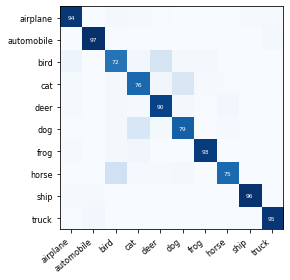

{'ACC': 0.8725, 'ARI': 0.7551730643043464, 'NMI': 0.786887017630736, 'ACC Top-5': 0.988, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Get topk


/content/Unsupervised-Classification/eval.py:127: UserWarning: masked_select received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/TensorAdvancedIndexing.cpp:1474.)
  proto_indices = torch.masked_select(indices.view(-1), one_hot.view(-1))


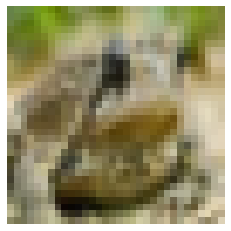

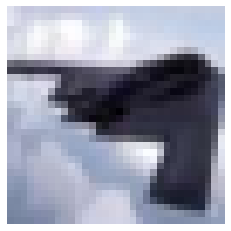

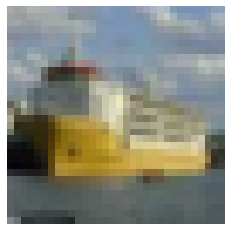

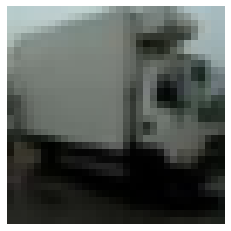

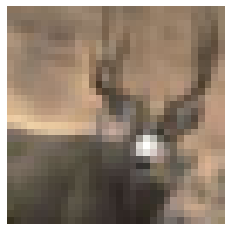

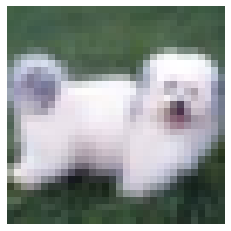

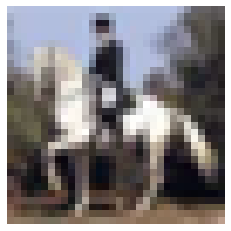

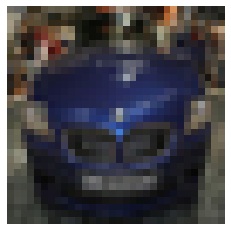

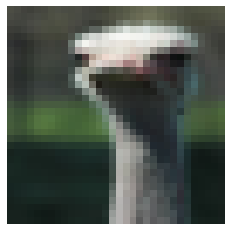

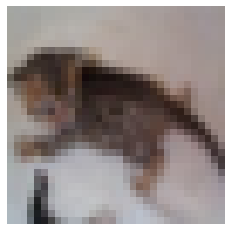

In [ ]:
%run 'eval.py' --config_exp configs/selflabel/selflabel_cifar10.yml --model repository_eccv/cifar-10/selflabel/model.pth.tar --visualize_prototypes

## CIFAR-10 - Threshold 0.9, epoch 50 at selflabelling step

In [ ]:
!pip install faiss-gpu
!git clone https://github.com/wvangansbeke/Unsupervised-Classification.git
%cd Unsupervised-Classification
!export CUDA_VISIBLE_DEVICES=0
!mkdir repository_eccv/
!mkdir repository_eccv/cifar-10/
!mkdir repository_eccv/cifar-10/pretext/
!mkdir repository_eccv/cifar-10/scan/
!mkdir repository_eccv/cifar-10/selflabel/
!gdown https://drive.google.com/u/0/uc?id=1Cl5oAcJKoNE5FSTZsBSAKLcyA5jXGgTT
!mv simclr_cifar-10.pth.tar repository_eccv/cifar-10/pretext/checkpoint.pth.tar  # Move model to correct location
!gdown https://drive.google.com/u/0/uc?id=1v6b6jJY5M4-duSqWpGFmdf9e9T3dPrx0
!mv scan_cifar-10.pth.tar repository_eccv/cifar-10/scan/model.pth.tar
!gdown https://drive.google.com/u/0/uc?id=18gITFzAbQsGS5vt8hyi5HjbeRDsVLihw
!mv selflabel_cifar-10.pth.tar repository_eccv/cifar-10/selflabel/model.pth.tar  #not used
!echo "root_dir: repository_eccv/" > configs/env.yml

     |████████████████████████████████| 85.5 MB 111 kB/s 
Cloning into 'Unsupervised-Classification'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 195 (delta 70), reused 52 (delta 52), pack-reused 94
Receiving objects: 100% (195/195), 13.41 MiB | 28.49 MiB/s, done.
Resolving deltas: 100% (98/98), done.
/content/Unsupervised-Classification
Downloading...
From: https://drive.google.com/u/0/uc?id=1Cl5oAcJKoNE5FSTZsBSAKLcyA5jXGgTT
To: /content/Unsupervised-Classification/simclr_cifar-10.pth.tar
100% 46.1M/46.1M [00:00<00:00, 232MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1v6b6jJY5M4-duSqWpGFmdf9e9T3dPrx0
To: /content/Unsupervised-Classification/scan_cifar-10.pth.tar
100% 44.8M/44.8M [00:00<00:00, 239MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=18gITFzAbQsGS5vt8hyi5HjbeRDsVLihw
To: /content/Unsupervised-Classification/selflabel_cifar-10.pth.tar
100% 

In [ ]:
%%writefile configs/selflabel/selflabel_cifar10.yml
# setup
setup: selflabel

# ema
use_ema: False

# Threshold
confidence_threshold: 0.90

# Criterion
criterion: confidence-cross-entropy
criterion_kwargs:
   apply_class_balancing: True

# Model
backbone: resnet18
num_heads: 1

# Dataset
train_db_name: cifar-10
val_db_name: cifar-10
num_classes: 10

# Transformations
augmentation_strategy: ours 
augmentation_kwargs:
   crop_size: 32
   normalize:
      mean: [0.4914, 0.4822, 0.4465]
      std: [0.2023, 0.1994, 0.2010]
   num_strong_augs: 4
   cutout_kwargs:
     n_holes: 1
     length: 16
     random: True

transformation_kwargs:
   crop_size: 32
   normalize:
      mean: [0.4914, 0.4822, 0.4465]
      std: [0.2023, 0.1994, 0.2010]

# Hyperparameters
epochs: 50
optimizer: adam
optimizer_kwargs:
   lr: 0.0001
   weight_decay: 0.0001
batch_size: 1000
num_workers: 8

# Scheduler
scheduler: constant

Overwriting configs/selflabel/selflabel_cifar10.yml


In [ ]:
%run 'selflabel.py' --config_env configs/env.yml --config_exp configs/selflabel/selflabel_cifar10.yml

{'setup': 'selflabel', 'use_ema': False, 'confidence_threshold': 0.9, 'criterion': 'confidence-cross-entropy', 'criterion_kwargs': {'apply_class_balancing': True}, 'backbone': 'resnet18', 'num_heads': 1, 'train_db_name': 'cifar-10', 'val_db_name': 'cifar-10', 'num_classes': 10, 'augmentation_strategy': 'ours', 'augmentation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2023, 0.1994, 0.201]}, 'num_strong_augs': 4, 'cutout_kwargs': {'n_holes': 1, 'length': 16, 'random': True}}, 'transformation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2023, 0.1994, 0.201]}}, 'epochs': 50, 'optimizer': 'adam', 'optimizer_kwargs': {'lr': 0.0001, 'weight_decay': 0.0001}, 'batch_size': 1000, 'num_workers': 8, 'scheduler': 'constant', 'pretext_dir': 'repository_eccv/cifar-10/pretext', 'pretext_checkpoint': 'repository_eccv/cifar-10/pretext/checkpoint.pth.tar', 'pretext_model': 'repository_eccv/cifar-10/pretext/model.pth.tar', 't

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /path/to/cifar-10/cifar-10-python.tar.gz to /path/to/cifar-10/


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Files already downloaded and verified
Train samples 50000 - Val samples 10000
No checkpoint file at repository_eccv/cifar-10/selflabel/checkpoint.pth.tar
Starting main loop
Epoch 1/50
----------
Adjusted learning rate to 0.00010
Train ...
Epoch: [0][ 0/50]	Loss 1.1086e-01 (1.1086e-01)
Epoch: [0][25/50]	Loss 1.1019e-01 (1.0767e-01)
Evaluate ...
{'ACC': 0.8454, 'ARI': 0.7116554899473395, 'NMI': 0.7484713467752845, 'ACC Top-5': 0.9884, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 2/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [1][ 0/50]	Loss 1.1700e-01 (1.1700e-01)
Epoch: [1][25/50]	Loss 9.8539e-02 (1.1100e-01)
Evaluate ...
{'ACC': 0.8486, 'ARI': 0.717238823456687, 'NMI': 0.7549480093643351, 'ACC Top-5': 0.9901, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 3/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [2][ 0/50]	Loss 1.1800e-01 (1.1800e-01)
Epoch: [2][25/50]	Loss 1.1100e-01 (1.1058e-01)
Evaluate ...
{'ACC': 0.8523, 'ARI': 0.722682878340236, 'NMI': 0.7586605678374427, 'ACC Top-5': 0.9902, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 4/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [3][ 0/50]	Loss 8.9680e-02 (8.9680e-02)
Epoch: [3][25/50]	Loss 1.1863e-01 (1.1325e-01)
Evaluate ...
{'ACC': 0.8519, 'ARI': 0.7219763344279058, 'NMI': 0.7607639644947441, 'ACC Top-5': 0.9912, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 5/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [4][ 0/50]	Loss 1.2927e-01 (1.2927e-01)
Epoch: [4][25/50]	Loss 1.2207e-01 (1.1072e-01)
Evaluate ...
{'ACC': 0.8583, 'ARI': 0.7328566065775176, 'NMI': 0.7680184312979865, 'ACC Top-5': 0.9909, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 6/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [5][ 0/50]	Loss 8.7305e-02 (8.7305e-02)
Epoch: [5][25/50]	Loss 1.1553e-01 (1.0631e-01)
Evaluate ...
{'ACC': 0.858, 'ARI': 0.7314415787785896, 'NMI': 0.7682449372006357, 'ACC Top-5': 0.9916, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 7/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [6][ 0/50]	Loss 1.2120e-01 (1.2120e-01)
Epoch: [6][25/50]	Loss 1.2169e-01 (1.1104e-01)
Evaluate ...
{'ACC': 0.8629, 'ARI': 0.7392031220134504, 'NMI': 0.7739813896160975, 'ACC Top-5': 0.9932, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 8/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [7][ 0/50]	Loss 1.4462e-01 (1.4462e-01)
Epoch: [7][25/50]	Loss 9.7718e-02 (1.1271e-01)
Evaluate ...
{'ACC': 0.8607, 'ARI': 0.7366872992450445, 'NMI': 0.7726332378794708, 'ACC Top-5': 0.9915, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 9/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [8][ 0/50]	Loss 1.0310e-01 (1.0310e-01)
Epoch: [8][25/50]	Loss 1.0403e-01 (1.0855e-01)
Evaluate ...
{'ACC': 0.8591, 'ARI': 0.7340787834848699, 'NMI': 0.7694632723616851, 'ACC Top-5': 0.9914, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 10/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [9][ 0/50]	Loss 1.1316e-01 (1.1316e-01)
Epoch: [9][25/50]	Loss 1.1891e-01 (1.0790e-01)
Evaluate ...
{'ACC': 0.8597, 'ARI': 0.7348777125146538, 'NMI': 0.7694701680307335, 'ACC Top-5': 0.9928, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 11/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [10][ 0/50]	Loss 1.0344e-01 (1.0344e-01)
Epoch: [10][25/50]	Loss 9.6004e-02 (1.1414e-01)
Evaluate ...
{'ACC': 0.8616, 'ARI': 0.7368972318444844, 'NMI': 0.7705389526046731, 'ACC Top-5': 0.9922, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 12/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [11][ 0/50]	Loss 8.5220e-02 (8.5220e-02)
Epoch: [11][25/50]	Loss 1.2399e-01 (1.0597e-01)
Evaluate ...
{'ACC': 0.8609, 'ARI': 0.7359906055567285, 'NMI': 0.7701889379339628, 'ACC Top-5': 0.9905, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 13/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [12][ 0/50]	Loss 1.1889e-01 (1.1889e-01)
Epoch: [12][25/50]	Loss 1.2778e-01 (1.1376e-01)
Evaluate ...
{'ACC': 0.8599, 'ARI': 0.7359849946079533, 'NMI': 0.770459725944391, 'ACC Top-5': 0.9906, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 14/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [13][ 0/50]	Loss 1.3611e-01 (1.3611e-01)
Epoch: [13][25/50]	Loss 1.1965e-01 (1.1549e-01)
Evaluate ...
{'ACC': 0.8623, 'ARI': 0.739393657660571, 'NMI': 0.7730107443612619, 'ACC Top-5': 0.9915, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 15/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [14][ 0/50]	Loss 1.3890e-01 (1.3890e-01)
Epoch: [14][25/50]	Loss 9.2153e-02 (1.1543e-01)
Evaluate ...
{'ACC': 0.862, 'ARI': 0.738293511448967, 'NMI': 0.7746083994412899, 'ACC Top-5': 0.992, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 16/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [15][ 0/50]	Loss 1.3097e-01 (1.3097e-01)
Epoch: [15][25/50]	Loss 7.2491e-02 (1.0724e-01)
Evaluate ...
{'ACC': 0.865, 'ARI': 0.7444741168680845, 'NMI': 0.7780047957758973, 'ACC Top-5': 0.9933, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 17/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [16][ 0/50]	Loss 1.1244e-01 (1.1244e-01)
Epoch: [16][25/50]	Loss 9.2903e-02 (1.1041e-01)
Evaluate ...
{'ACC': 0.866, 'ARI': 0.7452102521143121, 'NMI': 0.7777137016838533, 'ACC Top-5': 0.992, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 18/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [17][ 0/50]	Loss 7.8674e-02 (7.8674e-02)
Epoch: [17][25/50]	Loss 1.3814e-01 (1.0831e-01)
Evaluate ...
{'ACC': 0.8651, 'ARI': 0.7440382835643037, 'NMI': 0.7779711354802132, 'ACC Top-5': 0.9908, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 19/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [18][ 0/50]	Loss 1.0218e-01 (1.0218e-01)
Epoch: [18][25/50]	Loss 1.2662e-01 (1.0604e-01)
Evaluate ...
{'ACC': 0.8643, 'ARI': 0.7425919884328961, 'NMI': 0.7774862563654644, 'ACC Top-5': 0.9911, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 20/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [19][ 0/50]	Loss 9.1795e-02 (9.1795e-02)
Epoch: [19][25/50]	Loss 1.0171e-01 (1.0947e-01)
Evaluate ...
{'ACC': 0.8649, 'ARI': 0.7428758846036128, 'NMI': 0.7761381220512884, 'ACC Top-5': 0.9904, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 21/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [20][ 0/50]	Loss 1.3891e-01 (1.3891e-01)
Epoch: [20][25/50]	Loss 1.2970e-01 (1.1623e-01)
Evaluate ...
{'ACC': 0.8683, 'ARI': 0.7493120680653346, 'NMI': 0.7821483022974733, 'ACC Top-5': 0.9907, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 22/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [21][ 0/50]	Loss 1.1577e-01 (1.1577e-01)
Epoch: [21][25/50]	Loss 1.3811e-01 (1.0745e-01)
Evaluate ...
{'ACC': 0.8649, 'ARI': 0.7445646264196655, 'NMI': 0.7785030214996806, 'ACC Top-5': 0.9902, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 23/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [22][ 0/50]	Loss 1.1261e-01 (1.1261e-01)
Epoch: [22][25/50]	Loss 1.1261e-01 (1.1212e-01)
Evaluate ...
{'ACC': 0.864, 'ARI': 0.7419395703941262, 'NMI': 0.7764505812031296, 'ACC Top-5': 0.9917, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 24/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [23][ 0/50]	Loss 1.0116e-01 (1.0116e-01)
Epoch: [23][25/50]	Loss 9.4524e-02 (1.0640e-01)
Evaluate ...
{'ACC': 0.8661, 'ARI': 0.7460214507296572, 'NMI': 0.7804448989697639, 'ACC Top-5': 0.9918, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 25/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [24][ 0/50]	Loss 8.7381e-02 (8.7381e-02)
Epoch: [24][25/50]	Loss 1.0905e-01 (1.0755e-01)
Evaluate ...
{'ACC': 0.8659, 'ARI': 0.7453884814880425, 'NMI': 0.7785466334899445, 'ACC Top-5': 0.9905, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 26/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [25][ 0/50]	Loss 1.0945e-01 (1.0945e-01)
Epoch: [25][25/50]	Loss 1.2617e-01 (1.1143e-01)
Evaluate ...
{'ACC': 0.8672, 'ARI': 0.7466863526670852, 'NMI': 0.7790974738317381, 'ACC Top-5': 0.9906, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 27/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [26][ 0/50]	Loss 1.0141e-01 (1.0141e-01)
Epoch: [26][25/50]	Loss 1.2647e-01 (1.1158e-01)
Evaluate ...
{'ACC': 0.868, 'ARI': 0.7477590025668047, 'NMI': 0.7810050391515608, 'ACC Top-5': 0.992, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 28/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [27][ 0/50]	Loss 1.1657e-01 (1.1657e-01)
Epoch: [27][25/50]	Loss 9.8108e-02 (1.0965e-01)
Evaluate ...
{'ACC': 0.864, 'ARI': 0.7408462500983408, 'NMI': 0.7760053804228318, 'ACC Top-5': 0.9931, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 29/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [28][ 0/50]	Loss 9.6706e-02 (9.6706e-02)
Epoch: [28][25/50]	Loss 1.0404e-01 (1.0760e-01)
Evaluate ...
{'ACC': 0.8658, 'ARI': 0.7442648987612751, 'NMI': 0.7758389596662801, 'ACC Top-5': 0.9915, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 30/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [29][ 0/50]	Loss 1.0482e-01 (1.0482e-01)
Epoch: [29][25/50]	Loss 1.1465e-01 (1.1340e-01)
Evaluate ...
{'ACC': 0.8665, 'ARI': 0.745104062167413, 'NMI': 0.7775279711738778, 'ACC Top-5': 0.9905, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 31/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [30][ 0/50]	Loss 1.1573e-01 (1.1573e-01)
Epoch: [30][25/50]	Loss 1.2235e-01 (1.0960e-01)
Evaluate ...
{'ACC': 0.8654, 'ARI': 0.7427740967769462, 'NMI': 0.7752803804248045, 'ACC Top-5': 0.992, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 32/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [31][ 0/50]	Loss 1.0087e-01 (1.0087e-01)
Epoch: [31][25/50]	Loss 1.2148e-01 (1.0923e-01)
Evaluate ...
{'ACC': 0.8675, 'ARI': 0.7465963997048447, 'NMI': 0.7793438342276754, 'ACC Top-5': 0.9903, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 33/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [32][ 0/50]	Loss 9.1553e-02 (9.1553e-02)
Epoch: [32][25/50]	Loss 1.2991e-01 (1.0842e-01)
Evaluate ...
{'ACC': 0.8686, 'ARI': 0.7503016863963468, 'NMI': 0.7826243868567835, 'ACC Top-5': 0.9915, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 34/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [33][ 0/50]	Loss 8.1535e-02 (8.1535e-02)
Epoch: [33][25/50]	Loss 1.0631e-01 (1.0282e-01)
Evaluate ...
{'ACC': 0.8678, 'ARI': 0.7490143301128324, 'NMI': 0.7832585318271101, 'ACC Top-5': 0.9924, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 35/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [34][ 0/50]	Loss 1.2604e-01 (1.2604e-01)
Epoch: [34][25/50]	Loss 1.0861e-01 (1.0556e-01)
Evaluate ...
{'ACC': 0.8664, 'ARI': 0.7457763446073706, 'NMI': 0.7785495127576528, 'ACC Top-5': 0.9898, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 36/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [35][ 0/50]	Loss 9.6476e-02 (9.6476e-02)
Epoch: [35][25/50]	Loss 1.0569e-01 (1.0668e-01)
Evaluate ...
{'ACC': 0.867, 'ARI': 0.7459199716908038, 'NMI': 0.7813216417866885, 'ACC Top-5': 0.9891, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 37/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [36][ 0/50]	Loss 1.0606e-01 (1.0606e-01)
Epoch: [36][25/50]	Loss 9.3935e-02 (1.0535e-01)
Evaluate ...
{'ACC': 0.8664, 'ARI': 0.7436925490107392, 'NMI': 0.7799557480578184, 'ACC Top-5': 0.9892, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 38/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [37][ 0/50]	Loss 1.0280e-01 (1.0280e-01)
Epoch: [37][25/50]	Loss 1.0061e-01 (1.0704e-01)
Evaluate ...
{'ACC': 0.8655, 'ARI': 0.7440070426041449, 'NMI': 0.7781340995516587, 'ACC Top-5': 0.9888, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 39/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [38][ 0/50]	Loss 1.6090e-01 (1.6090e-01)
Epoch: [38][25/50]	Loss 9.0867e-02 (1.0462e-01)
Evaluate ...
{'ACC': 0.8673, 'ARI': 0.7470891825951634, 'NMI': 0.7807246177760299, 'ACC Top-5': 0.9911, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 40/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [39][ 0/50]	Loss 9.9917e-02 (9.9917e-02)
Epoch: [39][25/50]	Loss 1.2464e-01 (1.0769e-01)
Evaluate ...
{'ACC': 0.8675, 'ARI': 0.7462902949988893, 'NMI': 0.7792056966945609, 'ACC Top-5': 0.9894, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 41/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [40][ 0/50]	Loss 1.0607e-01 (1.0607e-01)
Epoch: [40][25/50]	Loss 9.8728e-02 (1.0021e-01)
Evaluate ...
{'ACC': 0.8664, 'ARI': 0.7453696902131223, 'NMI': 0.7797510700028688, 'ACC Top-5': 0.9889, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 42/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [41][ 0/50]	Loss 1.1938e-01 (1.1938e-01)
Epoch: [41][25/50]	Loss 1.2698e-01 (1.0566e-01)
Evaluate ...
{'ACC': 0.8662, 'ARI': 0.7451256836370415, 'NMI': 0.7788255525850231, 'ACC Top-5': 0.9878, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 43/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [42][ 0/50]	Loss 8.5789e-02 (8.5789e-02)
Epoch: [42][25/50]	Loss 1.2397e-01 (1.0605e-01)
Evaluate ...
{'ACC': 0.8676, 'ARI': 0.747540042027244, 'NMI': 0.7796914940417478, 'ACC Top-5': 0.9869, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 44/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [43][ 0/50]	Loss 8.6011e-02 (8.6011e-02)
Epoch: [43][25/50]	Loss 9.9225e-02 (1.0715e-01)
Evaluate ...
{'ACC': 0.8676, 'ARI': 0.7472855163963376, 'NMI': 0.7796765023421306, 'ACC Top-5': 0.9896, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 45/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [44][ 0/50]	Loss 1.2075e-01 (1.2075e-01)
Epoch: [44][25/50]	Loss 1.0596e-01 (1.0526e-01)
Evaluate ...
{'ACC': 0.8679, 'ARI': 0.7479123518931565, 'NMI': 0.7797269230149678, 'ACC Top-5': 0.9897, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 46/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [45][ 0/50]	Loss 9.9625e-02 (9.9625e-02)
Epoch: [45][25/50]	Loss 9.1677e-02 (1.0336e-01)
Evaluate ...
{'ACC': 0.8667, 'ARI': 0.7457187171721478, 'NMI': 0.779821409551827, 'ACC Top-5': 0.9878, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 47/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [46][ 0/50]	Loss 1.0840e-01 (1.0840e-01)
Epoch: [46][25/50]	Loss 1.0350e-01 (1.0134e-01)
Evaluate ...
{'ACC': 0.8655, 'ARI': 0.7435245415468343, 'NMI': 0.7780254343725757, 'ACC Top-5': 0.9903, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 48/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [47][ 0/50]	Loss 8.0215e-02 (8.0215e-02)
Epoch: [47][25/50]	Loss 1.0445e-01 (1.0123e-01)
Evaluate ...
{'ACC': 0.8663, 'ARI': 0.744247909432112, 'NMI': 0.7777650850717555, 'ACC Top-5': 0.988, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 49/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [48][ 0/50]	Loss 1.3000e-01 (1.3000e-01)
Epoch: [48][25/50]	Loss 1.0468e-01 (1.0248e-01)
Evaluate ...
{'ACC': 0.869, 'ARI': 0.7500831889260061, 'NMI': 0.782448541561585, 'ACC Top-5': 0.9871, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Epoch 50/50
----------
Adjusted learning rate to 0.00010
Train ...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [49][ 0/50]	Loss 1.1351e-01 (1.1351e-01)
Epoch: [49][25/50]	Loss 1.4005e-01 (1.0741e-01)
Evaluate ...
{'ACC': 0.8683, 'ARI': 0.7494918201128451, 'NMI': 0.7818928764670076, 'ACC Top-5': 0.9883, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Checkpoint ...
Evaluate model at the end


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'ACC': 0.8683, 'ARI': 0.7494918201128451, 'NMI': 0.7818928764670076, 'ACC Top-5': 0.9883, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}


Read config file configs/selflabel/selflabel_cifar10.yml ...
{'setup': 'selflabel', 'use_ema': False, 'confidence_threshold': 0.9, 'criterion': 'confidence-cross-entropy', 'criterion_kwargs': {'apply_class_balancing': True}, 'backbone': 'resnet18', 'num_heads': 1, 'train_db_name': 'cifar-10', 'val_db_name': 'cifar-10', 'num_classes': 10, 'augmentation_strategy': 'ours', 'augmentation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2023, 0.1994, 0.201]}, 'num_strong_augs': 4, 'cutout_kwargs': {'n_holes': 1, 'length': 16, 'random': True}}, 'transformation_kwargs': {'crop_size': 32, 'normalize': {'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2023, 0.1994, 0.201]}}, 'epochs': 50, 'optimizer': 'adam', 'optimizer_kwargs': {'lr': 0.0001, 'weight_decay': 0.0001}, 'batch_size': 512, 'num_workers': 8, 'scheduler': 'constant'}
Get validation dataset ...
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Number of samples: 10000
Get model ...
ClusteringModel(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (shortcut): Sequential()
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride

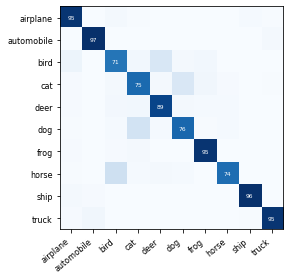

{'ACC': 0.8683, 'ARI': 0.7494918201128451, 'NMI': 0.7818928764670076, 'ACC Top-5': 0.9883, 'hungarian_match': [(0, 6), (1, 0), (2, 8), (3, 9), (4, 4), (5, 5), (6, 7), (7, 1), (8, 2), (9, 3)]}
Get topk


/content/Unsupervised-Classification/eval.py:127: UserWarning: masked_select received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/TensorAdvancedIndexing.cpp:1474.)
  proto_indices = torch.masked_select(indices.view(-1), one_hot.view(-1))


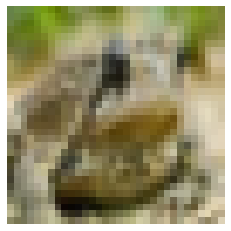

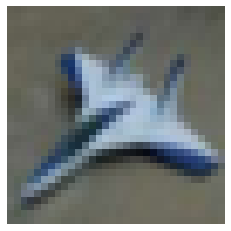

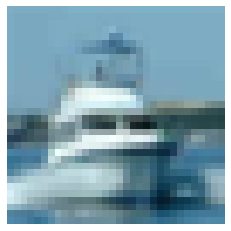

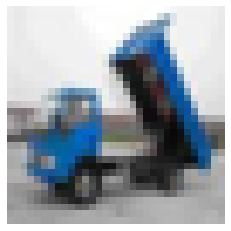

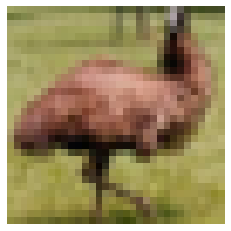

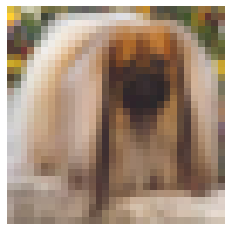

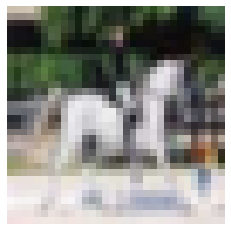

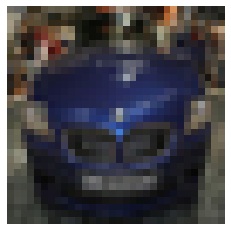

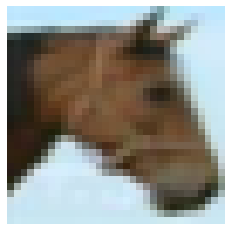

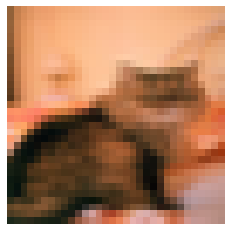

In [ ]:
%run 'eval.py' --config_exp configs/selflabel/selflabel_cifar10.yml --model repository_eccv/cifar-10/selflabel/model.pth.tar --visualize_prototypes

## STL

In [ ]:
# download code and pretrained model
!pip install faiss-gpu
!git clone https://github.com/wvangansbeke/Unsupervised-Classification.git
%cd Unsupervised-Classification
!export CUDA_VISIBLE_DEVICES=0
!mkdir repository_eccv/
!mkdir repository_eccv/stl-10/
!mkdir repository_eccv/stl-10/pretext/
!gdown https://drive.google.com/u/0/uc?id=1261NDFfXuKR2Dh4RWHYYhcicdcPag9NZ
!mv simclr_stl-10.pth.tar repository_eccv/stl-10/pretext/checkpoint.pth.tar  # Move model to correct location
!echo "root_dir: repository_eccv/" > configs/env.yml

Cloning into 'Unsupervised-Classification'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 195 (delta 70), reused 52 (delta 52), pack-reused 94
Receiving objects: 100% (195/195), 13.41 MiB | 10.23 MiB/s, done.
Resolving deltas: 100% (98/98), done.
/content/Unsupervised-Classification
Downloading...
From: https://drive.google.com/u/0/uc?id=1261NDFfXuKR2Dh4RWHYYhcicdcPag9NZ
To: /content/Unsupervised-Classification/simclr_stl-10.pth.tar
100% 46.1M/46.1M [00:01<00:00, 34.3MB/s]


In [ ]:
# !python simclr.py --config_env configs/env.yml --config_exp configs/pretext/simclr_stl10.yml 

In [ ]:
!python tutorial_nn.py --config_env configs/env.yml --config_exp configs/pretext/simclr_stl10.yml

{'setup': 'simclr', 'backbone': 'resnet18', 'model_kwargs': {'head': 'mlp', 'features_dim': 128}, 'train_db_name': 'stl-10', 'val_db_name': 'stl-10', 'num_classes': 10, 'criterion': 'simclr', 'criterion_kwargs': {'temperature': 0.1}, 'epochs': 500, 'optimizer': 'sgd', 'optimizer_kwargs': {'nesterov': False, 'weight_decay': 0.0001, 'momentum': 0.9, 'lr': 0.4}, 'scheduler': 'cosine', 'scheduler_kwargs': {'lr_decay_rate': 0.1}, 'batch_size': 512, 'num_workers': 8, 'augmentation_strategy': 'simclr', 'augmentation_kwargs': {'random_resized_crop': {'size': 96, 'scale': [0.2, 1.0]}, 'color_jitter_random_apply': {'p': 0.8}, 'color_jitter': {'brightness': 0.4, 'contrast': 0.4, 'saturation': 0.4, 'hue': 0.1}, 'random_grayscale': {'p': 0.2}, 'normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}, 'transformation_kwargs': {'crop_size': 96, 'normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}, 'pretext_dir': 'repository_eccv/stl-10/pretext', 'pretext_chec

In [ ]:
!python scan.py --config_env configs/env.yml --config_exp configs/scan/scan_stl10.yml

{'setup': 'scan', 'criterion': 'scan', 'criterion_kwargs': {'entropy_weight': 5.0}, 'update_cluster_head_only': False, 'num_heads': 1, 'backbone': 'resnet18', 'train_db_name': 'stl-10', 'val_db_name': 'stl-10', 'num_classes': 10, 'num_neighbors': 20, 'augmentation_strategy': 'ours', 'augmentation_kwargs': {'crop_size': 96, 'normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}, 'num_strong_augs': 4, 'cutout_kwargs': {'n_holes': 1, 'length': 32, 'random': True}}, 'transformation_kwargs': {'crop_size': 96, 'normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}, 'optimizer': 'adam', 'optimizer_kwargs': {'lr': 0.0001, 'weight_decay': 0.0001}, 'epochs': 100, 'batch_size': 128, 'num_workers': 8, 'scheduler': 'constant', 'pretext_dir': 'repository_eccv/stl-10/pretext', 'pretext_checkpoint': 'repository_eccv/stl-10/pretext/checkpoint.pth.tar', 'pretext_model': 'repository_eccv/stl-10/pretext/model.pth.tar', 'topk_neighbors_train_path': 'repository_eccv/